In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance
from xgboost import XGBClassifier
import time

import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

data = pd.read_csv('pima-indians-diabetes.csv')
df = pd.DataFrame(data)

In [2]:
df['target'].value_counts() # 클래스 살짝 불균형 데이터셋 

0    500
1    268
Name: target, dtype: int64

768개의 데이터 중 Negative 값(0)이 500개, Positive 값(1)이 268개로 Negative가 상대적으로 많다. 즉, 전체 데이터의 65.1%가 Negative이다.

In [3]:
df.isnull().sum()

N_times_pregnant               0
oral_glucose                   0
blood_pressure                 0
Triceps_skin_fold_thickness    0
serum_insulin                  0
Body_mass_index                0
Diabetes_pedigree_function     0
Age                            0
target                         0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   N_times_pregnant             768 non-null    int64  
 1   oral_glucose                 768 non-null    int64  
 2   blood_pressure               768 non-null    int64  
 3   Triceps_skin_fold_thickness  768 non-null    int64  
 4   serum_insulin                768 non-null    int64  
 5   Body_mass_index              768 non-null    float64
 6   Diabetes_pedigree_function   768 non-null    float64
 7   Age                          768 non-null    int64  
 8   target                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


확인해본 결과 Null 값은 존재하지 않으며, 모두 숫자형 데이터입니다.
때문에 Null 값과 문자열 처리를 위한 별도의 별도의 피처 인코딩은 필요하지 않습니다.

In [5]:
df.describe()

#blood_pressure(혈압) , oral_glucose(혈당) , Triceps_skin_fold_thickness(팔 찝었을 때 피부 두께) , serum_insulin(인슐린 수치) , Body_mass_index	(bmi), Diabetes pedigree function(혈통)

,N_times_pregnant,oral_glucose,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,Body_mass_index,Diabetes_pedigree_function,Age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


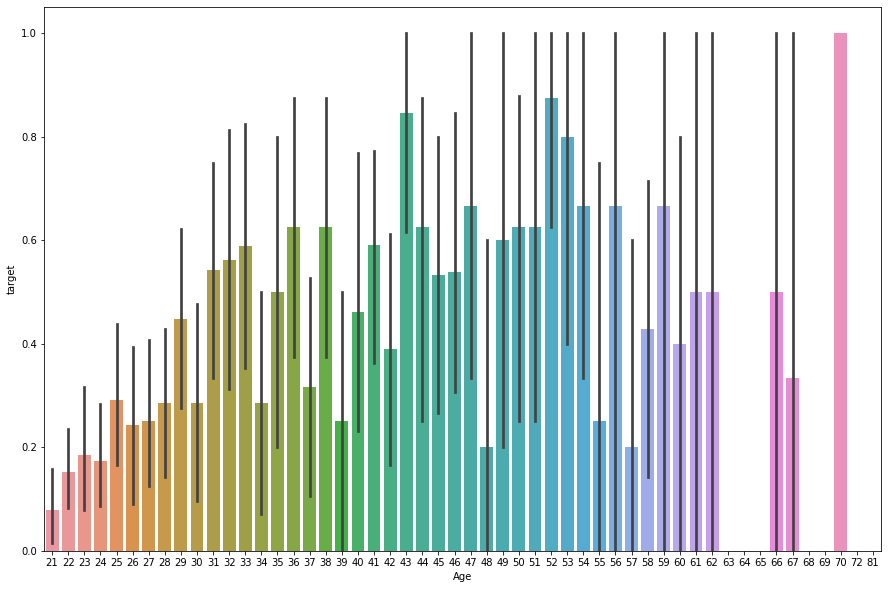

In [6]:
plt.figure(figsize=(15,10)) 
sns.barplot(x="Age", y="target", data=df)
plt.savefig("age.jpg")

<AxesSubplot:xlabel='N_times_pregnant', ylabel='target'>

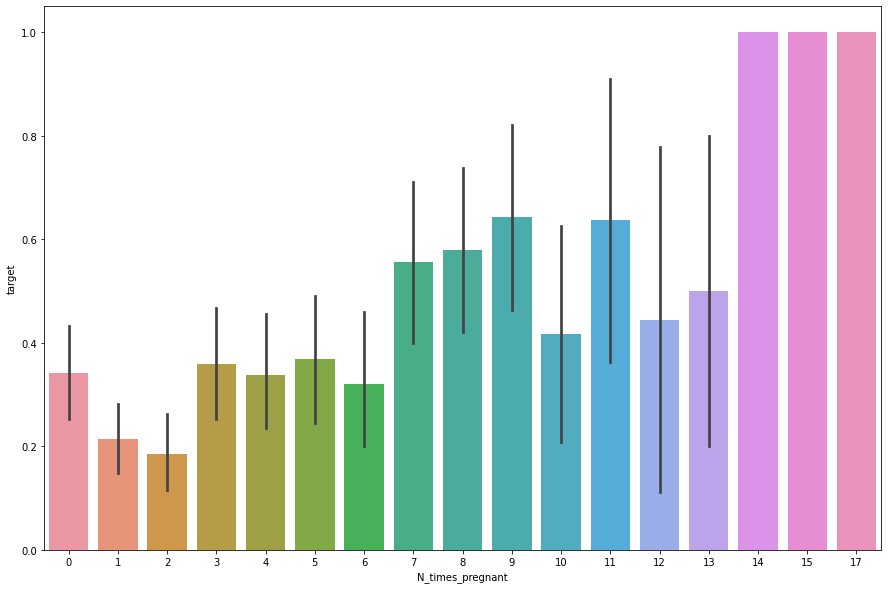

In [7]:
plt.figure(figsize=(15,10)) 
sns.barplot(x="N_times_pregnant", y="target", data=df)

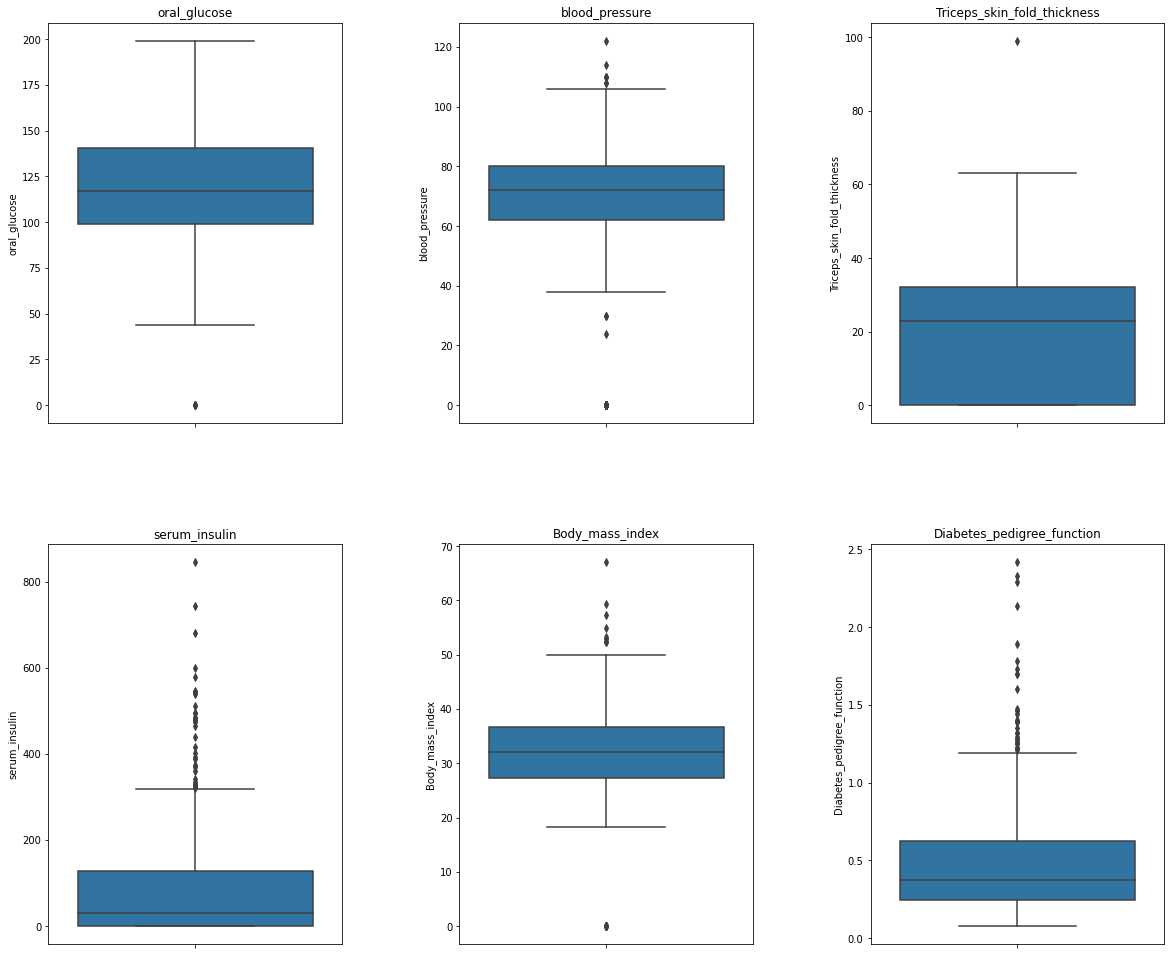

In [8]:
f, axes = plt.subplots(2, 3 , figsize=(20,16))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.3)
plt.rc('axes', labelsize=15)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=15)  # 범례 폰트 크기
plt.rc('figure', titlesize=20) # figure title 폰트 크기

axes[0,0].set_title("oral_glucose")
sns.boxplot(  y="oral_glucose" ,data=df,  orient='v' , ax=axes[0,0])

axes[0,1].set_title("blood_pressure" )
sns.boxplot(  y="blood_pressure" ,data=df,  orient='v' , ax=axes[0,1])

axes[0,2].set_title("Triceps_skin_fold_thickness" )
sns.boxplot(  y="Triceps_skin_fold_thickness" ,data=df,  orient='v' , ax=axes[0,2])

axes[1,0].set_title("serum_insulin")
sns.boxplot(  y="serum_insulin" ,data=df,  orient='v' , ax=axes[1,0])

axes[1,1].set_title("Body_mass_index" )
sns.boxplot(  y="Body_mass_index" ,data=df,  orient='v' , ax=axes[1,1])

axes[1,2].set_title("Diabetes_pedigree_function" )
sns.boxplot(  y="Diabetes_pedigree_function" ,data=df,  orient='v' , ax=axes[1,2])

plt.savefig('boxplot.png',dpi=300)

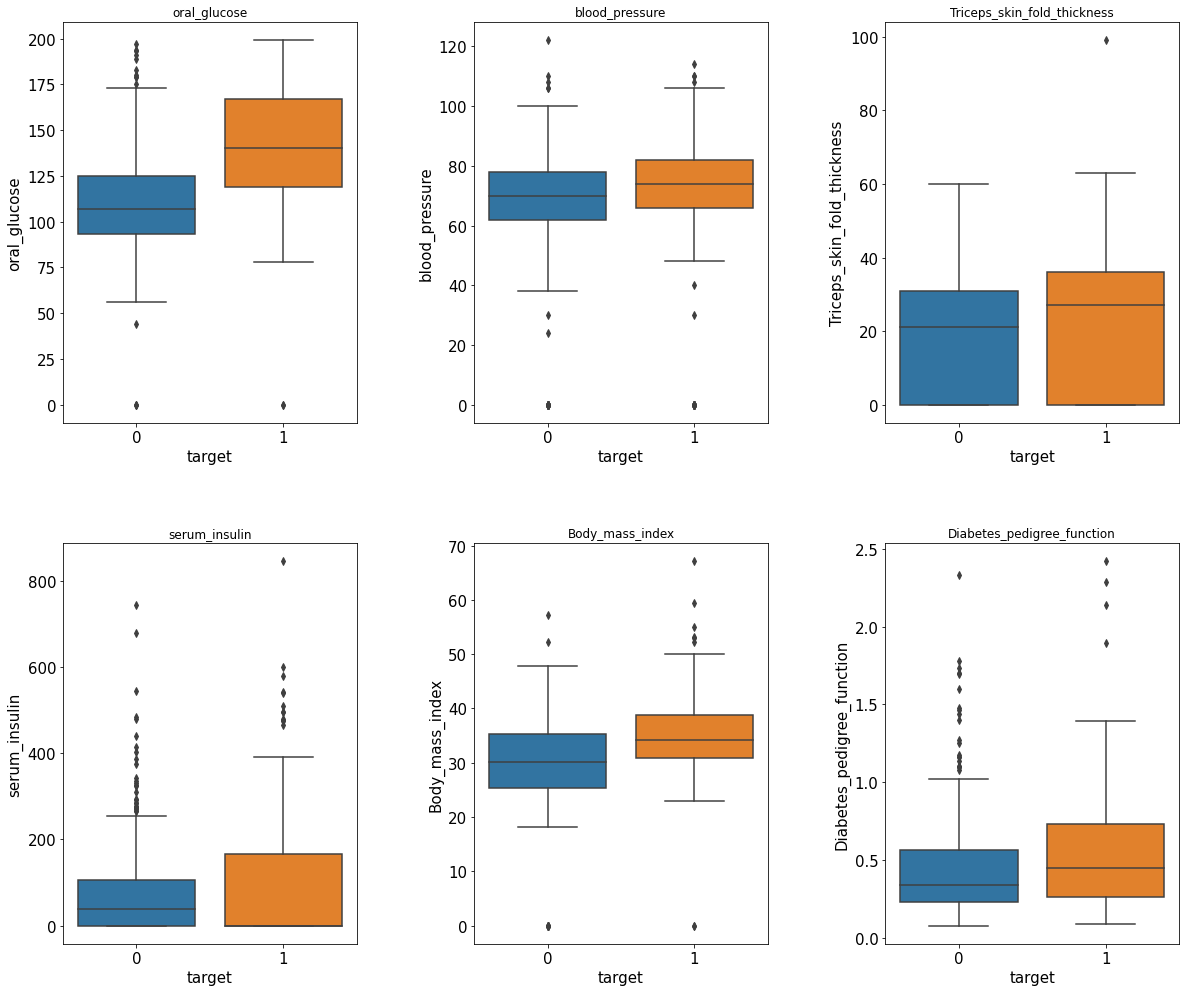

In [9]:
f, axes = plt.subplots(2, 3 , figsize=(20,16))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.3)
plt.rc('axes', labelsize=15)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=15)  # 범례 폰트 크기
plt.rc('figure', titlesize=20) # figure title 폰트 크기

axes[0,0].set_title("oral_glucose")
sns.boxplot(x = "target",  y="oral_glucose" ,data=df,  orient='v' , ax=axes[0,0])

axes[0,1].set_title("blood_pressure" )
sns.boxplot(x = "target",  y="blood_pressure" ,data=df,  orient='v' , ax=axes[0,1])

axes[0,2].set_title("Triceps_skin_fold_thickness" )
sns.boxplot(x = "target",  y="Triceps_skin_fold_thickness" ,data=df,  orient='v' , ax=axes[0,2])

axes[1,0].set_title("serum_insulin")
sns.boxplot(x = "target",  y="serum_insulin" ,data=df,  orient='v' , ax=axes[1,0])

axes[1,1].set_title("Body_mass_index" )
sns.boxplot(x = "target",  y="Body_mass_index" ,data=df,  orient='v' , ax=axes[1,1])

axes[1,2].set_title("Diabetes_pedigree_function" )
sns.boxplot(x = "target",  y="Diabetes_pedigree_function" ,data=df,  orient='v' , ax=axes[1,2])

plt.savefig('boxplot222.png',dpi=300)


plt.show()

In [10]:
def show_lower_outlier(df, stdev=3, show_total=False): 
    # lower bound outliers 
    cols = df.columns 
    print(df.shape) 
    for col in cols: 
        #std
        mean = df[col].mean()  
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75) 
        IQR = Q3 - Q1 
        outlier_step = 1.5 * IQR
        threshold = Q1 - outlier_step 
        n_outlier = np.sum(df[col] < threshold) 
        print(col + ". mean : "+str(round(mean,3))+", num of outlier : "+str(n_outlier))
        if (show_total == True) & (n_outlier != 0): 
            print(df.loc[(df[col] < threshold),col][:5])
        print(" -> cnt of zero : " + str(np.sum(df[col] == 0))+"\n")
        print("")
              
show_lower_outlier(df,show_total=True)


(768, 9)
N_times_pregnant. mean : 3.845, num of outlier : 0
 -> cnt of zero : 111


oral_glucose. mean : 120.895, num of outlier : 5
75     0
182    0
342    0
349    0
502    0
Name: oral_glucose, dtype: int64
 -> cnt of zero : 5


blood_pressure. mean : 69.105, num of outlier : 38
7      0
15     0
18    30
49     0
60     0
Name: blood_pressure, dtype: int64
 -> cnt of zero : 35


Triceps_skin_fold_thickness. mean : 20.536, num of outlier : 0
 -> cnt of zero : 227


serum_insulin. mean : 79.799, num of outlier : 0
 -> cnt of zero : 374


Body_mass_index. mean : 31.993, num of outlier : 11
9      0.0
49     0.0
60     0.0
81     0.0
145    0.0
Name: Body_mass_index, dtype: float64
 -> cnt of zero : 11


Diabetes_pedigree_function. mean : 0.472, num of outlier : 0
 -> cnt of zero : 0


Age. mean : 33.241, num of outlier : 0
 -> cnt of zero : 0


target. mean : 0.349, num of outlier : 0
 -> cnt of zero : 500




In [11]:
cols = df.columns 
print(df.shape) 
for col in cols: 
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75) 
    IQR = Q3 - Q1 
    outlier_step = 1.5 * IQR

    std = df[col].std() 
    threshold = Q3 + outlier_step 
    n_outlier = np.sum(df[col] > threshold) 
    print(col + ". num of outlier : "+str(n_outlier))

(768, 9)
N_times_pregnant. num of outlier : 4
oral_glucose. num of outlier : 0
blood_pressure. num of outlier : 7
Triceps_skin_fold_thickness. num of outlier : 1
serum_insulin. num of outlier : 34
Body_mass_index. num of outlier : 8
Diabetes_pedigree_function. num of outlier : 29
Age. num of outlier : 9
target. num of outlier : 0


In [12]:
def new_col_age_group(x):
    if x // 10 == 2 :
        return '20s'
    elif  x // 10 == 3 :
        return '30s'
    elif  x // 10 == 4 :
        return '40s'
    elif  x // 10 == 5 :
        return '50s'
    elif  x // 10 == 6 :
        return '60s'
    elif  x // 10 == 7 :
        return '70s'
    elif  x // 10 == 8 :
        return '80s'

    
df['Age_group'] = df['Age'].apply(new_col_age_group)
df.head()

,N_times_pregnant,oral_glucose,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,Body_mass_index,Diabetes_pedigree_function,Age,target,Age_group
0,6,148,72,35,0,33.6,0.627,50,1,50s
1,1,85,66,29,0,26.6,0.351,31,0,30s
2,8,183,64,0,0,23.3,0.672,32,1,30s
3,1,89,66,23,94,28.1,0.167,21,0,20s
4,0,137,40,35,168,43.1,2.288,33,1,30s


젊은 층보다 중고령층인 경우 발병확률이 높음을 알 수 있다.

In [13]:
Q1 = np.percentile(df['blood_pressure'], 25)
Q3 = np.percentile(df['blood_pressure'], 75) 
IQR = Q3 - Q1 
outlier_step = 1.5 * IQR
threshold = Q1 - outlier_step 

df['blood_pressure'] = df['blood_pressure'].apply(lambda x: 0 if x < threshold else x)
df['blood_pressure'] = df['blood_pressure'].replace(0,np.NaN)
print("이상치 제거 타겟 개수 : ", df['blood_pressure'].isnull().sum())
print(df['blood_pressure'].mean())
print("")
df['blood_pressure'] = df['blood_pressure'].fillna(df.groupby('Age_group')['blood_pressure'].transform('median'))
print("이상치 제거 이후 : ", df['blood_pressure'].isnull().sum())
print(df['blood_pressure'].mean())

이상치 제거 타겟 개수 :  38
72.58767123287672

이상치 제거 이후 :  0
72.52213541666667


In [14]:
Q1 = np.percentile(df['Body_mass_index'], 25)
Q3 = np.percentile(df['Body_mass_index'], 75) 
IQR = Q3 - Q1 
outlier_step = 1.5 * IQR
threshold = Q1 - outlier_step 

df['Body_mass_index'] = df['Body_mass_index'].apply(lambda x: 0 if x < threshold else x)
df['Body_mass_index'] = df['Body_mass_index'].replace(0,np.NaN)
print("이상치 제거 타겟 개수 : ", df['Body_mass_index'].isnull().sum())
print(df['Body_mass_index'].mean())
print("")
df['Body_mass_index'] = df['Body_mass_index'].fillna(df.groupby('Age_group')['Body_mass_index'].transform('mean'))
print("이상치 제거 이후 : ", df['Body_mass_index'].isnull().sum())
print(df['Body_mass_index'].mean())

이상치 제거 타겟 개수 :  11
32.457463672391015

이상치 제거 이후 :  0
32.44909515813865


In [15]:
from sklearn.neighbors import KNeighborsClassifier

df_glucose_train = df[df['oral_glucose'] != 0]
df_glucose_test = df[df['oral_glucose'] == 0]


df_glucose_train_X = df_glucose_train[['N_times_pregnant', 'blood_pressure',
       'Triceps_skin_fold_thickness', 'serum_insulin', 'Body_mass_index',
       'Diabetes_pedigree_function']]

df_glucose_train_y = df_glucose_train['oral_glucose']

df_glucose_test_X = df_glucose_test[['N_times_pregnant', 'blood_pressure',
       'Triceps_skin_fold_thickness', 'serum_insulin', 'Body_mass_index',
       'Diabetes_pedigree_function']]

df_glucose_test_y = df_glucose_test['oral_glucose']

classifier = KNeighborsClassifier(n_neighbors = 5)

classifier.fit(df_glucose_train_X, df_glucose_train_y)
df_glucose_pred_y = classifier.predict(df_glucose_test_X)
df_glucose_test['oral_glucose'] = df_glucose_pred_y
df = pd.concat([df_glucose_train,df_glucose_test])

In [16]:
condition = (df.target == 1) & (df.serum_insulin == 0)
df_diabetes_1 = df.loc[condition]

conditon2 = (df.target == 0) | (df.serum_insulin != 0)
df_diabetes_2  = df.loc[conditon2]


Q1 = np.percentile(df_diabetes_2['serum_insulin'], 25)
Q3 = np.percentile(df_diabetes_2['serum_insulin'], 75) 
IQR = Q3 - Q1 
outlier_step = 1.5 * IQR
threshold = Q1 - outlier_step 

df_diabetes_2['serum_insulin'] = df_diabetes_2['serum_insulin'].apply(lambda x: 0 if x < threshold else x)
df_diabetes_2['serum_insulin'] = df_diabetes_2['serum_insulin'].replace(0,np.NaN)
print("이상치 제거 타겟 개수 : ", df_diabetes_2['serum_insulin'].isnull().sum())
print(df_diabetes_2['serum_insulin'].mean())
print("")
df_diabetes_2['serum_insulin'] = df_diabetes_2['serum_insulin'].fillna(df_diabetes_2.groupby('Age_group')['serum_insulin'].transform('median'))
print("이상치 제거 이후 : ", df_diabetes_2['serum_insulin'].isnull().sum())
print(df_diabetes_2['serum_insulin'].mean())

df = pd.concat([df_diabetes_1,df_diabetes_2])
df.shape

이상치 제거 타겟 개수 :  236
155.5482233502538

이상치 제거 이후 :  1
147.45468998410175


(768, 10)

In [17]:
df[df['serum_insulin'].isna()]

,N_times_pregnant,oral_glucose,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,Body_mass_index,Diabetes_pedigree_function,Age,target,Age_group
453,2,119,82.0,0,NaN,19.6,0.832,72,0,70s


In [18]:
df['Age_group'].value_counts()

20s    396
30s    165
40s    118
50s     57
60s     29
70s      2
80s      1
Name: Age_group, dtype: int64

In [19]:
condition_temp = (df.Age_group == "80s")
df_temp = df.loc[condition_temp]
df_temp

,N_times_pregnant,oral_glucose,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,Body_mass_index,Diabetes_pedigree_function,Age,target,Age_group
459,9,134,74.0,33,60.0,25.9,0.46,81,0,80s


In [20]:
df['serum_insulin'] = df['serum_insulin'].fillna(60.0)

In [21]:
df.isnull().sum()

N_times_pregnant               0
oral_glucose                   0
blood_pressure                 0
Triceps_skin_fold_thickness    0
serum_insulin                  0
Body_mass_index                0
Diabetes_pedigree_function     0
Age                            0
target                         0
Age_group                      0
dtype: int64

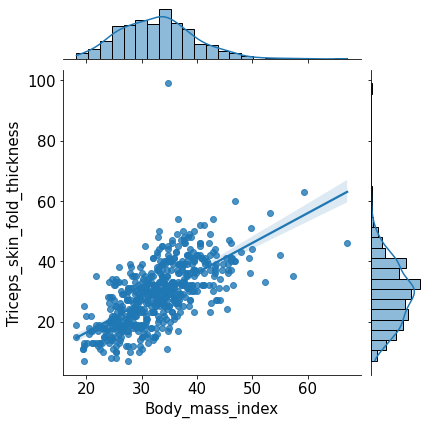

In [22]:
df_skin = df[df['Triceps_skin_fold_thickness'] != 0]

sns.jointplot(df_skin['Body_mass_index'], df_skin['Triceps_skin_fold_thickness'], kind='reg')
plt.savefig("skin.jpg",dpi=300)

In [23]:
df.columns

Index(['N_times_pregnant', 'oral_glucose', 'blood_pressure',
       'Triceps_skin_fold_thickness', 'serum_insulin', 'Body_mass_index',
       'Diabetes_pedigree_function', 'Age', 'target', 'Age_group'],
      dtype='object')

In [24]:
print("전처리 전 피부 두께 평균 : " , df['Triceps_skin_fold_thickness'].mean())


X_train_skin = df_skin[['N_times_pregnant', 'oral_glucose', 'blood_pressure',
        'serum_insulin', 'Body_mass_index',
       'Diabetes_pedigree_function', 'Age']]

y_train_skin = df_skin['Triceps_skin_fold_thickness']

df_skin2 = df[df['Triceps_skin_fold_thickness'] == 0]

X_test_skin = df_skin2[['N_times_pregnant', 'oral_glucose', 'blood_pressure',
        'serum_insulin', 'Body_mass_index',
       'Diabetes_pedigree_function', 'Age']]

from sklearn.linear_model import LinearRegression
line_fitter = LinearRegression()
line_fitter.fit(X_train_skin, y_train_skin)
y_predicted_skin = line_fitter.predict(X_test_skin)

df_skin2['Triceps_skin_fold_thickness'] = y_predicted_skin

df = pd.concat([df_skin,df_skin2])
print("전처리 후 피부 두께 평균 : " , df['Triceps_skin_fold_thickness'].mean())

전처리 전 피부 두께 평균 :  20.536458333333332
전처리 후 피부 두께 평균 :  28.922177869139546


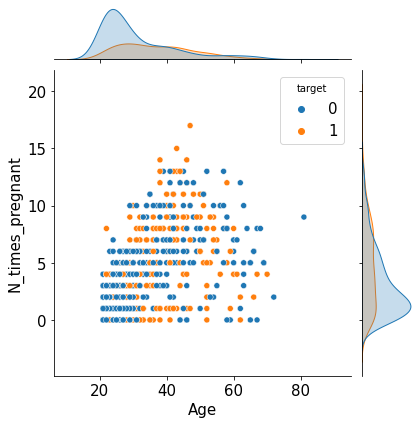

In [25]:
sns.jointplot(df['Age'], df['N_times_pregnant'], kind='scatter', hue=df['target'])
plt.savefig('pregnant')

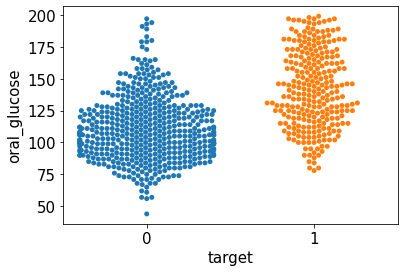

In [26]:
sns.swarmplot(x="target", y="oral_glucose", data=df)
plt.savefig('glucose2.jpg',dpi=300)
plt.show()

In [27]:
df['new_glucose'] = df['oral_glucose'].apply(lambda x: 0 if x < 126 else 1)
df.groupby(['new_glucose'])['target'].value_counts()

new_glucose  target
0            0         379
             1          92
1            1         176
             0         121
Name: target, dtype: int64

In [28]:
df.groupby(['Age_group'])['target'].value_counts()

Age_group  target
20s        0         312
           1          84
30s        0          89
           1          76
40s        1          65
           0          53
50s        1          34
           0          23
60s        0          21
           1           8
70s        0           1
           1           1
80s        0           1
Name: target, dtype: int64

In [29]:
df['new_age'] = df['Age'].apply(lambda x: 0 if x < 30 else (0 if x>=60 else 1))
df.groupby(['new_age'])['target'].value_counts()

new_age  target
0        0         335
         1          93
1        1         175
         0         165
Name: target, dtype: int64

In [30]:
#과체중 기준으로 나누자!

df['new_BMI'] = df['Body_mass_index'].apply(lambda x: 0 if x < 23 else 1)
df.groupby(['new_BMI'])['target'].value_counts()

new_BMI  target
0        0          49
         1           1
1        0         451
         1         267
Name: target, dtype: int64

In [31]:
cols = ['N_times_pregnant', 'oral_glucose', 'blood_pressure',
       'Triceps_skin_fold_thickness', 'serum_insulin', 'Body_mass_index',
       'Diabetes_pedigree_function', 'Age']

for col in cols: 
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75) 
    IQR = Q3 - Q1 
    outlier_step = 1.5 * IQR
    threshold = Q3 + outlier_step 
    n_outlier = np.sum(df[col] > threshold) 
    print(col + ". num of outlier : "+str(n_outlier))

N_times_pregnant. num of outlier : 4
oral_glucose. num of outlier : 0
blood_pressure. num of outlier : 10
Triceps_skin_fold_thickness. num of outlier : 4
serum_insulin. num of outlier : 41
Body_mass_index. num of outlier : 8
Diabetes_pedigree_function. num of outlier : 29
Age. num of outlier : 9


In [32]:
cols = ['Diabetes_pedigree_function', 'serum_insulin']

print("before drop outlier : {}".format(df.shape)) 
for col in cols: 
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75) 
    IQR = Q3 - Q1 
    outlier_step = 1.5 * IQR
    threshold = Q3 + outlier_step 
    n_outlier = np.sum(df[col] > threshold) 
    df.drop(df[df[col] > threshold].index[:], inplace=True)

df.dropna() 
print("after drop outlier : {}".format(df.shape))


before drop outlier : (768, 13)
after drop outlier : (696, 13)


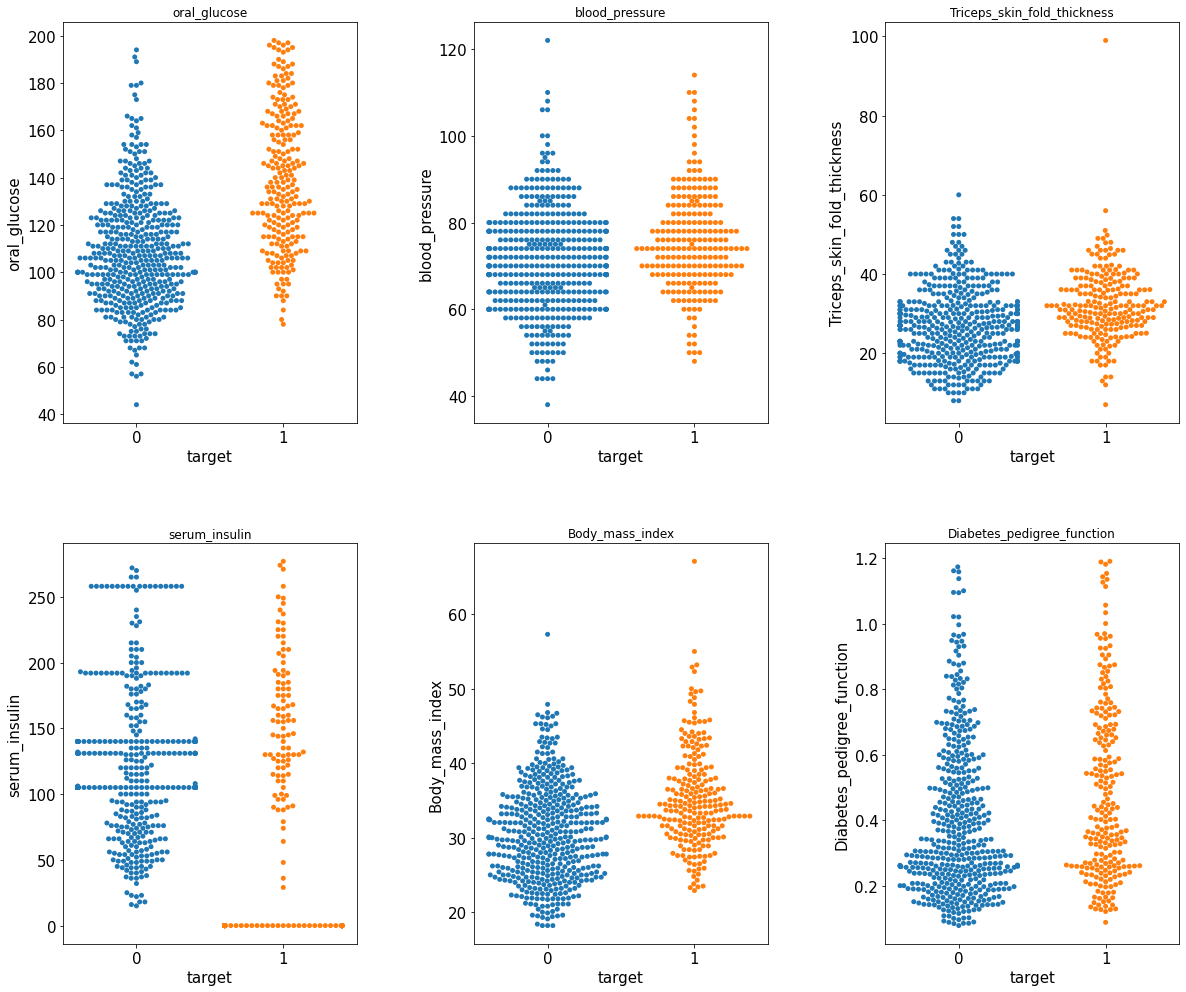

In [33]:
f, axes = plt.subplots(2, 3 , figsize=(20,16))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.3)
plt.rc('axes', labelsize=15)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=15)  # 범례 폰트 크기
plt.rc('figure', titlesize=20) # figure title 폰트 크기

axes[0,0].set_title("oral_glucose")
sns.swarmplot(x = "target",  y="oral_glucose" ,data=df,  orient='v' , ax=axes[0,0])

axes[0,1].set_title("blood_pressure" )
sns.swarmplot(x = "target",  y="blood_pressure" ,data=df,  orient='v' , ax=axes[0,1])

axes[0,2].set_title("Triceps_skin_fold_thickness" )
sns.swarmplot(x = "target",  y="Triceps_skin_fold_thickness" ,data=df,  orient='v' , ax=axes[0,2])

axes[1,0].set_title("serum_insulin")
sns.swarmplot(x = "target",  y="serum_insulin" ,data=df,  orient='v' , ax=axes[1,0])

axes[1,1].set_title("Body_mass_index" )
sns.swarmplot(x = "target",  y="Body_mass_index" ,data=df,  orient='v' , ax=axes[1,1])

axes[1,2].set_title("Diabetes_pedigree_function" )
sns.swarmplot(x = "target",  y="Diabetes_pedigree_function" ,data=df,  orient='v' , ax=axes[1,2])

plt.savefig('swarmplot.png',dpi=300)


plt.show()

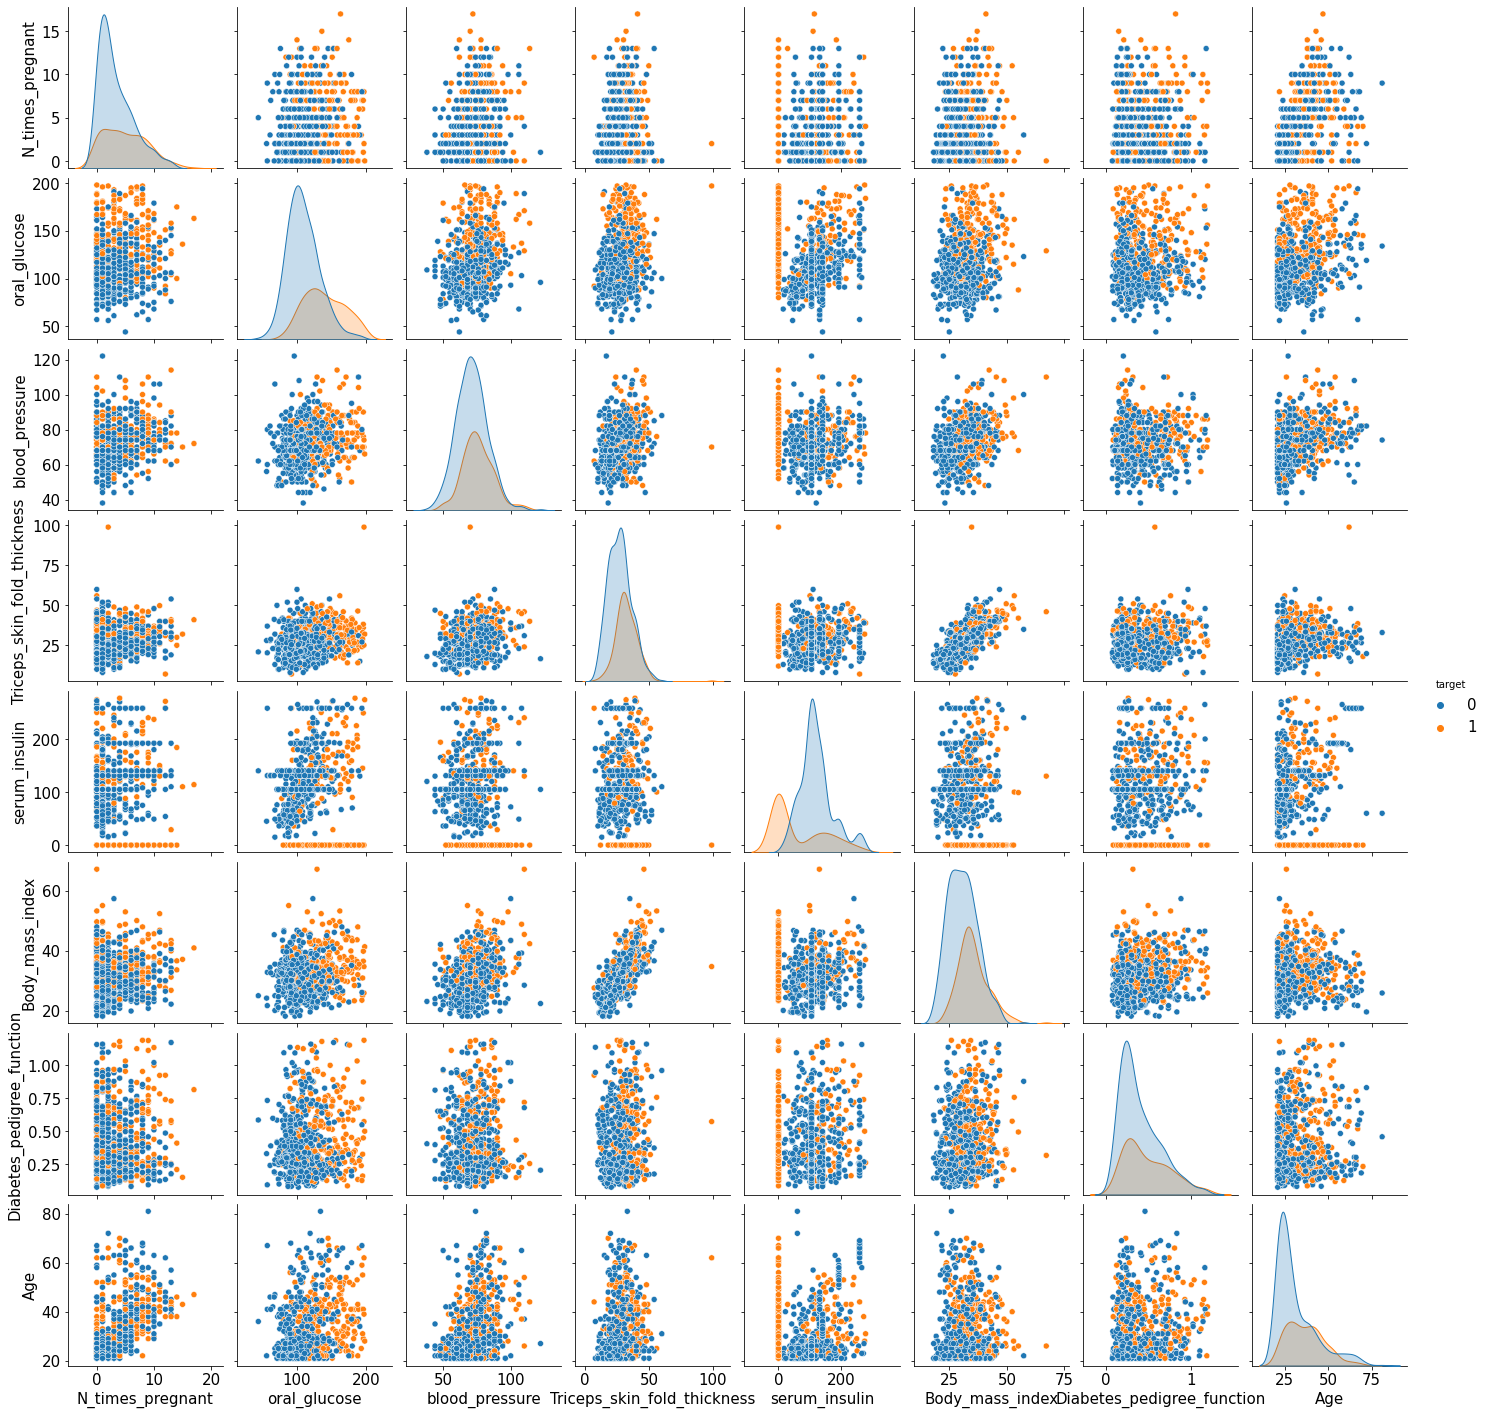

In [34]:

sns.pairplot(df[['N_times_pregnant', 'oral_glucose', 'blood_pressure',
       'Triceps_skin_fold_thickness', 'serum_insulin', 'Body_mass_index',
       'Diabetes_pedigree_function', 'Age', 'target']], hue='target')
plt.savefig('pairplot.jpg')


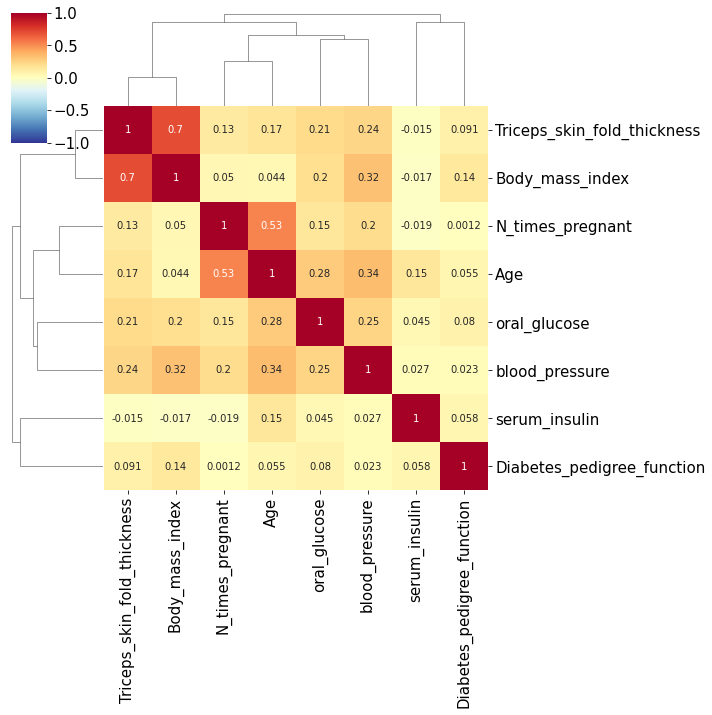

In [35]:
sns.clustermap(df[['N_times_pregnant', 'oral_glucose', 'blood_pressure',
       'Triceps_skin_fold_thickness', 'serum_insulin', 'Body_mass_index',
       'Diabetes_pedigree_function', 'Age']].corr(), 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )
plt.savefig('corr.jpg')

In [36]:
import scipy.stats as stats 
stats.pearsonr(df['Triceps_skin_fold_thickness'],df['Body_mass_index'])

(0.703197013200944, 6.742107477970278e-105)

In [37]:
X = df[['N_times_pregnant', 'oral_glucose', 'blood_pressure',
       'Triceps_skin_fold_thickness', 'serum_insulin', 'Body_mass_index',
       'Diabetes_pedigree_function', 'Age']]
y = df['target']
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)
print(X_train.shape)

sm = SMOTE(random_state=0)
X_resampled2, y_resampled2 = sm.fit_resample(X_train,y_train)
    
print(X_resampled2.shape)

adasyn = ADASYN(random_state=0)
X_resampled3, y_resampled3 = adasyn.fit_resample(X_train,y_train)
print(X_resampled3.shape)

(556, 8)
(748, 8)
(748, 8)


In [ ]:
def fit_clasifiers(gs_clfs, X, y):
    for clf in gs_clfs:
        print(X.shape)
        clf.fit(X, y)
    
def show_gridsearch_result(gs_clfs):
    estimators = []
    scores = []
    params = []
    for clf in gs_clfs:
        estimators.append(str(clf.estimator))
        scores.append(clf.best_score_)
        params.append(clf.best_params_)


    for i, val in enumerate(estimators):
        print(val)
        print(scores[i])
        print(params[i])
        
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y)

lr = LogisticRegression()
svc = SVC(probability=True)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()

param_lr = {"penalty":["l1", "l2", "elasticnet", "none"]}
param_svc = {"kernel":["linear", "poly", "rbf", "sigmoid"]}
param_tree = {
    "max_depth" : [3, 4, 5, 6, 7],
    "min_samples_split" : [2, 3, 4],
    "min_samples_leaf" : [5,10, 15, 20,25]
}
param_xgb = { "n_estimators": range(25, 100, 25), "max_depth": [3, 4, 5, 6,7], "learning_rate": [0.0001, 0.001, 0.01, 0.1], "subsample": [0.7, 0.9]}



gs_lr = GridSearchCV(lr, param_grid=param_lr, cv=5, refit=True)
gs_svc = GridSearchCV(svc, param_grid=param_svc, cv=5, refit=True)
gs_dt = GridSearchCV(dt, param_grid=param_tree, cv=5, refit=True)
gs_rf = GridSearchCV(rf, param_grid=param_tree, cv=5, refit=True)
gs_xgb = GridSearchCV(xgb, param_grid=param_xgb, cv=5, refit=True)

gs_clfs = [gs_lr, gs_svc, gs_dt, gs_rf, gs_xgb]
fit_clasifiers(gs_clfs, X_train, y_train)
show_gridsearch_result(gs_clfs)

In [ ]:
lr = LogisticRegression()
svc = SVC(probability=True)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()

param_lr = {"penalty":["l1", "l2", "elasticnet", "none"]}
param_svc = {"kernel":["linear", "poly", "rbf", "sigmoid"]}
param_tree = {
    "max_depth" : [3, 4, 5, 6, 7],
    "min_samples_split" : [2, 3, 4],
    "min_samples_leaf" : [5,10, 15, 20,25]
}
param_xgb = { "n_estimators": range(25, 100, 25), "max_depth": [3, 4, 5, 6,7], "learning_rate": [0.0001, 0.001, 0.01, 0.1], "subsample": [0.7, 0.9]}



gs_lr = GridSearchCV(lr, param_grid=param_lr, cv=5, refit=True)
gs_svc = GridSearchCV(svc, param_grid=param_svc, cv=5, refit=True)
gs_dt = GridSearchCV(dt, param_grid=param_tree, cv=5, refit=True)
gs_rf = GridSearchCV(rf, param_grid=param_tree, cv=5, refit=True)
gs_xgb = GridSearchCV(xgb, param_grid=param_xgb, cv=5, refit=True)


sm = SMOTE(random_state=0)
X_resampled, y_resampled = sm.fit_resample(X_train,y_train)

gs_clfs = [gs_lr, gs_svc, gs_dt, gs_rf, gs_xgb]
fit_clasifiers(gs_clfs, X_resampled, y_resampled)
show_gridsearch_result(gs_clfs)

In [ ]:
lr = LogisticRegression()
svc = SVC(probability=True)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()

param_lr = {"penalty":["l1", "l2", "elasticnet", "none"]}
param_svc = {"kernel":["linear", "poly", "rbf", "sigmoid"]}
param_tree = {
    "max_depth" : [3, 4, 5, 6, 7],
    "min_samples_split" : [2, 3, 4],
    "min_samples_leaf" : [5,10, 15, 20,25]
}
param_xgb = { "n_estimators": range(25, 100, 25), "max_depth": [3, 4, 5, 6,7], "learning_rate": [0.0001, 0.001, 0.01, 0.1], "subsample": [0.7, 0.9]}



gs_lr = GridSearchCV(lr, param_grid=param_lr, cv=5, refit=True)
gs_svc = GridSearchCV(svc, param_grid=param_svc, cv=5, refit=True)
gs_dt = GridSearchCV(dt, param_grid=param_tree, cv=5, refit=True)
gs_rf = GridSearchCV(rf, param_grid=param_tree, cv=5, refit=True)
gs_xgb = GridSearchCV(xgb, param_grid=param_xgb, cv=5, refit=True)


adasyn = ADASYN(random_state=0)
X_resampled2, y_resampled2 = adasyn.fit_resample(X_train,y_train)

gs_clfs = [gs_lr, gs_svc, gs_dt, gs_rf, gs_xgb]
fit_clasifiers(gs_clfs, X_resampled2, y_resampled2)
show_gridsearch_result(gs_clfs)

In [39]:
# get_clf_eval()
def get_clf_eval(y_test, pred=None, pred_proba=None):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)

    return [accuracy, precision, recall, f1, roc_auc]

start_time = time.time()

# 로지스틱 pure 
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []
performance = 0

for i in range(100):
    #학습 데이터 세트, 트레인 데이터 세트 분리
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

    # 로지스틱 회귀로 학습,예측 및 평가 수행. 
    lr_clf = LogisticRegression(penalty='none') #객체 생성
    lr_clf.fit(X_train , y_train) #학습
    pred = lr_clf.predict(X_test) #예측
    # roc_auc_score 수정에 따른 추가
    pred_proba = lr_clf.predict_proba(X_test)[:, 1] #예측 확률 array

    temp = get_clf_eval(y_test , pred, pred_proba)
    
    accuracy_list.append(temp[0])
    precision_list.append(temp[1])
    recall_list.append(temp[2])
    f1_list.append(temp[3])
    auc_list.append(temp[4])
    
    if performance < temp[0] *temp[3]:
        best_model = lr_clf
        performance = temp[0] *temp[3]
    
print('Pure')
print('평균 정확도: {0:.4f}, 평균 정밀도: {1:.4f}, 평균 재현율: {2:.4f}, 평균 F1: {3:.4f}, 평균 AUC:{4:.4f}'
          .format(np.mean(accuracy_list), np.mean(precision_list), np.mean(recall_list), np.mean(f1_list), np.mean(auc_list)))


# 로지스틱 SMOTE   
accuracy_list_smote = []
precision_list_smote  = []
recall_list_smote  = []
f1_list_smote  = []
auc_list_smote  = []
performance = 0

for i in range(100):
    #학습 데이터 세트, 트레인 데이터 세트 분리
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)
    sm = SMOTE(random_state=0)
    X_resampled2, y_resampled2 = sm.fit_resample(X_train,y_train)

    # 로지스틱 회귀로 학습,예측 및 평가 수행. 
    lr_clf2 = LogisticRegression(penalty='l2')  #객체 생성
    lr_clf2.fit(X_resampled2 , y_resampled2) #학습
    pred2 = lr_clf2.predict(X_test) #예측
    # roc_auc_score 수정에 따른 추가
    pred_proba2 = lr_clf2.predict_proba(X_test)[:, 1] #예측 확률 array

    temp2 = get_clf_eval(y_test , pred2, pred_proba2)
    
    accuracy_list_smote.append(temp2[0])
    precision_list_smote.append(temp2[1])
    recall_list_smote.append(temp2[2])
    f1_list_smote.append(temp2[3])
    auc_list_smote.append(temp2[4])
    
    if performance < temp2[0] *temp2[3]:
        best_model_smote = lr_clf2
        performance = temp2[0] *temp2[3]
    
print('SMOTE')
print('평균 정확도: {0:.4f}, 평균 정밀도: {1:.4f}, 평균 재현율: {2:.4f}, 평균 F1: {3:.4f}, 평균 AUC:{4:.4f}'
          .format(np.mean(accuracy_list_smote ), np.mean(precision_list_smote ), np.mean(recall_list_smote ), np.mean(f1_list_smote ), np.mean(auc_list_smote )))

# 로지스틱 ADASYN
accuracy_list_adasyn = []
precision_list_adasyn = []
recall_list_adasyn  = []
f1_list_adasyn  = []
auc_list_adasyn  = []
performance = 0

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)
    adasyn = ADASYN(random_state=0)
    X_resampled3, y_resampled3 = adasyn.fit_resample(X_train,y_train)

    # 로지스틱 회귀로 학습,예측 및 평가 수행. 
    lr_clf3 = LogisticRegression(penalty='l2')#객체 생성
    lr_clf3.fit(X_resampled3 , y_resampled3) #학습
    pred3 = lr_clf3.predict(X_test) #예측
    # roc_auc_score 수정에 따른 추가
    pred_proba3 = lr_clf3.predict_proba(X_test)[:, 1] #예측 확률 array

    temp3 = get_clf_eval(y_test , pred3, pred_proba3)
    
    accuracy_list_adasyn.append(temp3[0])
    precision_list_adasyn.append(temp3[1])
    recall_list_adasyn.append(temp3[2])
    f1_list_adasyn.append(temp3[3])
    auc_list_adasyn.append(temp3[4])
    
    if performance < temp3[0] *temp3[3]:
        best_model_adasyn = lr_clf3        
        performance = temp3[0] *temp3[3]
    
print('ADASYN')   
print('평균 정확도: {0:.4f}, 평균 정밀도: {1:.4f}, 평균 재현율: {2:.4f}, 평균 F1: {3:.4f}, 평균 AUC:{4:.4f}'
          .format(np.mean(accuracy_list_adasyn ), np.mean(precision_list_adasyn ), np.mean(recall_list_adasyn ), np.mean(f1_list_adasyn ), np.mean(auc_list_adasyn)))

df_lg = pd.DataFrame({'logistic_accuracy_pure' : accuracy_list,
                     'logistic_precision_pure' : precision_list,
                     'logistic_recall_pure' : recall_list,
                     'logistic_f1_pure' : f1_list,
                     'logistic_auc_pure' : auc_list,
                     
                     'logistic_accuracy_smote' : accuracy_list_smote,
                     'logistic_precision_smote' : precision_list_smote,
                     'logistic_recall_smote' : recall_list_smote,
                     'logistic_f1_smote' : f1_list_smote,
                     'logistic_auc_smote' : auc_list_smote,
                     
                     'logistic_accuracy_adasyn' : accuracy_list_adasyn,
                     'logistic_precision_adasyn' : precision_list_adasyn,
                     'logistic_recall_adasyn' : recall_list_adasyn,
                     'logistic_f1_adasyn' : f1_list_adasyn,
                     'logistic_auc_adasyn' : auc_list_adasyn}
                     )

end_time = time.time()
print("Time: {:.4f}sec".format((end_time - start_time)))


Pure
평균 정확도: 0.8487, 평균 정밀도: 0.8041, 평균 재현율: 0.7178, 평균 F1: 0.7563, 평균 AUC:0.8153
SMOTE
평균 정확도: 0.8255, 평균 정밀도: 0.7044, 평균 재현율: 0.8161, 평균 F1: 0.7547, 평균 AUC:0.8231
ADASYN
평균 정확도: 0.7861, 평균 정밀도: 0.6333, 평균 재현율: 0.8433, 평균 F1: 0.7218, 평균 AUC:0.8007
Time: 7.1730sec


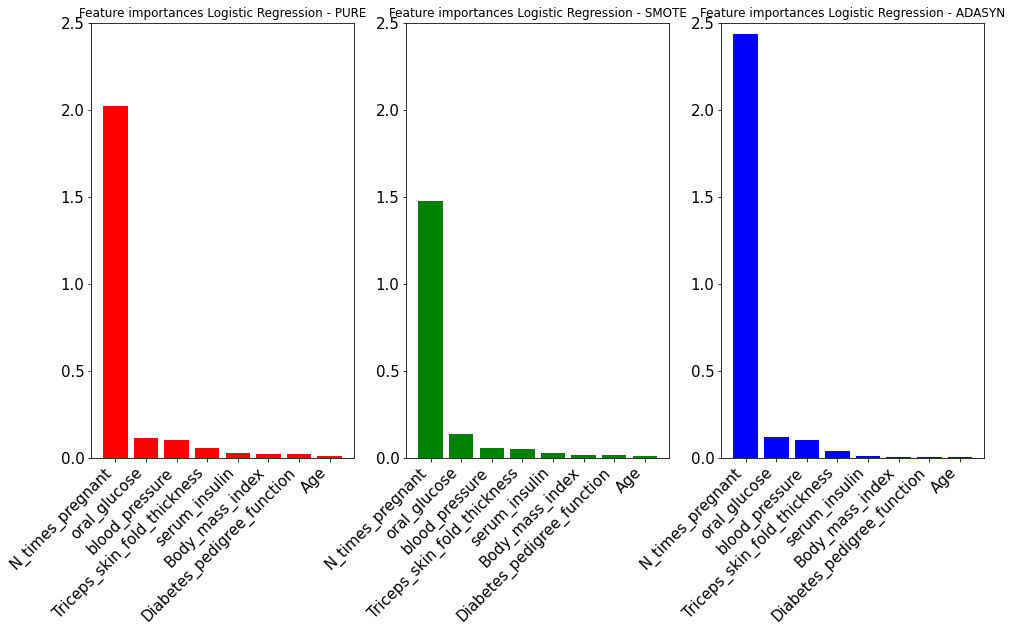

In [82]:
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

coefs = np.abs(best_model.coef_[0])
indices = np.argsort(coefs)[::-1]

axes[0].set_title("Feature importances Logistic Regression - PURE")
axes[0].bar(range(len(coefs)), coefs[indices],
       color="r", align="center")
axes[0].set_xticks(range(8), X_train.columns, rotation=45, ha='right')
axes[0].set_ylim([0, 2.5])

coefs = np.abs(best_model_smote.coef_[0])
indices = np.argsort(coefs)[::-1]

axes[1].set_title("Feature importances Logistic Regression - SMOTE")
axes[1].bar(range(len(coefs)), coefs[indices],
       color="g", align="center")
axes[1].set_xticks(range(8), X_train.columns, rotation=45, ha='right')
axes[1].set_ylim([0, 2.5])

coefs = np.abs(best_model_adasyn.coef_[0])
indices = np.argsort(coefs)[::-1]

axes[2].set_title("Feature importances Logistic Regression - ADASYN")
axes[2].bar(range(len(coefs)), coefs[indices],
       color="b", align="center")
axes[2].set_xticks(range(8), X_train.columns, rotation=45, ha='right')
axes[2].set_ylim([0, 2.5])

plt.savefig('logistic.jpg',dpi=300)

In [40]:
start_time = time.time()
# SVM pure 
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []
performance=0

for i in range(100):
    #학습 데이터 세트, 트레인 데이터 세트 분리
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

    # 로지스틱 회귀로 학습,예측 및 평가 수행. 
    svc_clf = SVC(probability=True, kernel='rbf') #객체 생성
    svc_clf.fit(X_train , y_train) #학습
    pred = svc_clf.predict(X_test) #예측
    # roc_auc_score 수정에 따른 추가
    pred_proba = svc_clf.predict_proba(X_test)[:, 1] #예측 확률 array

    temp = get_clf_eval(y_test , pred, pred_proba)
    
    accuracy_list.append(temp[0])
    precision_list.append(temp[1])
    recall_list.append(temp[2])
    f1_list.append(temp[3])
    auc_list.append(temp[4])
    
    if performance < temp[0] *temp[3]:
        best_model = svc_clf
        performance = temp[0] *temp[3]
            
print('Pure')
print('평균 정확도: {0:.4f}, 평균 정밀도: {1:.4f}, 평균 재현율: {2:.4f}, 평균 F1: {3:.4f}, 평균 AUC:{4:.4f}'
          .format(np.mean(accuracy_list), np.mean(precision_list), np.mean(recall_list), np.mean(f1_list), np.mean(auc_list)))


# SVC SMOTE   
accuracy_list_smote = []
precision_list_smote  = []
recall_list_smote  = []
f1_list_smote  = []
auc_list_smote  = []
performance=0

for i in range(100):
    #학습 데이터 세트, 트레인 데이터 세트 분리
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)
    sm = SMOTE(random_state=0)
    X_resampled2, y_resampled2 = sm.fit_resample(X_train,y_train)

    # 로지스틱 회귀로 학습,예측 및 평가 수행. 
    svc_clf2 = SVC(probability=True, kernel='rbf')  #객체 생성
    svc_clf2.fit(X_resampled2 , y_resampled2) #학습
    pred2 = svc_clf2.predict(X_test) #예측
    # roc_auc_score 수정에 따른 추가
    pred_proba2 = svc_clf2.predict_proba(X_test)[:, 1] #예측 확률 array

    temp2 = get_clf_eval(y_test , pred2, pred_proba2)
    
    accuracy_list_smote.append(temp2[0])
    precision_list_smote.append(temp2[1])
    recall_list_smote.append(temp2[2])
    f1_list_smote.append(temp2[3])
    auc_list_smote.append(temp2[4])
          
    if performance < temp2[0] *temp2[3]:
        best_model_smote = svc_clf2
        performance = temp2[0] *temp2[3]    
          
print('SMOTE')
print('평균 정확도: {0:.4f}, 평균 정밀도: {1:.4f}, 평균 재현율: {2:.4f}, 평균 F1: {3:.4f}, 평균 AUC:{4:.4f}'
          .format(np.mean(accuracy_list_smote ), np.mean(precision_list_smote ), np.mean(recall_list_smote ), np.mean(f1_list_smote ), np.mean(auc_list_smote )))

# SVC ADASYN
accuracy_list_adasyn = []
precision_list_adasyn = []
recall_list_adasyn  = []
f1_list_adasyn  = []
auc_list_adasyn  = []
performance=0

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)
    adasyn = ADASYN(random_state=0)
    X_resampled3, y_resampled3 = adasyn.fit_resample(X_train,y_train)

    # 로지스틱 회귀로 학습,예측 및 평가 수행. 
    svc_clf3 = SVC(probability=True, kernel='rbf')#객체 생성
    svc_clf3.fit(X_resampled3 , y_resampled3) #학습
    pred3 = svc_clf3.predict(X_test) #예측
    # roc_auc_score 수정에 따른 추가
    pred_proba3 = svc_clf3.predict_proba(X_test)[:, 1] #예측 확률 array

    temp3 = get_clf_eval(y_test , pred3, pred_proba3)
    
    accuracy_list_adasyn.append(temp3[0])
    precision_list_adasyn.append(temp3[1])
    recall_list_adasyn.append(temp3[2])
    f1_list_adasyn.append(temp3[3])
    auc_list_adasyn.append(temp3[4])
    
    if performance < temp3[0] *temp3[3]:
        best_model_adasyn = svc_clf3
        performance = temp3[0] *temp3[3] 
        
print('ADASYN')   
print('평균 정확도: {0:.4f}, 평균 정밀도: {1:.4f}, 평균 재현율: {2:.4f}, 평균 F1: {3:.4f}, 평균 AUC:{4:.4f}'
          .format(np.mean(accuracy_list_adasyn ), np.mean(precision_list_adasyn ), np.mean(recall_list_adasyn ), np.mean(f1_list_adasyn ), np.mean(auc_list_adasyn)))

df_svc = pd.DataFrame({'svm_accuracy_pure' : accuracy_list,
                     'svm_precision_pure' : precision_list,
                     'svm_recall_pure' : recall_list,
                     'svm_f1_pure' : f1_list,
                     'svm_auc_pure' : auc_list,
                     
                     'svm_accuracy_smote' : accuracy_list_smote,
                     'svm_precision_smote' : precision_list_smote,
                     'svm_recall_smote' : recall_list_smote,
                     'svm_f1_smote' : f1_list_smote,
                     'svm_auc_smote' : auc_list_smote,
                     
                     'svm_accuracy_adasyn' : accuracy_list_adasyn,
                     'svm_precision_adasyn' : precision_list_adasyn,
                     'svm_recall_adasyn' : recall_list_adasyn,
                     'svm_f1_adasyn' : f1_list_adasyn,
                     'svm_auc_adasyn' : auc_list_adasyn}
                     )

end_time = time.time()
print("Time: {:.4f}sec".format((end_time - start_time)))

Pure
평균 정확도: 0.8798, 평균 정밀도: 0.9398, 평균 재현율: 0.6791, 평균 F1: 0.7860, 평균 AUC:0.8286
SMOTE
평균 정확도: 0.8731, 평균 정밀도: 0.8219, 평균 재현율: 0.7898, 평균 F1: 0.8034, 평균 AUC:0.8518
ADASYN
평균 정확도: 0.8324, 평균 정밀도: 0.6929, 평균 재현율: 0.8904, 평균 F1: 0.7780, 평균 AUC:0.8472
Time: 16.1354sec


(0.0, 0.25)

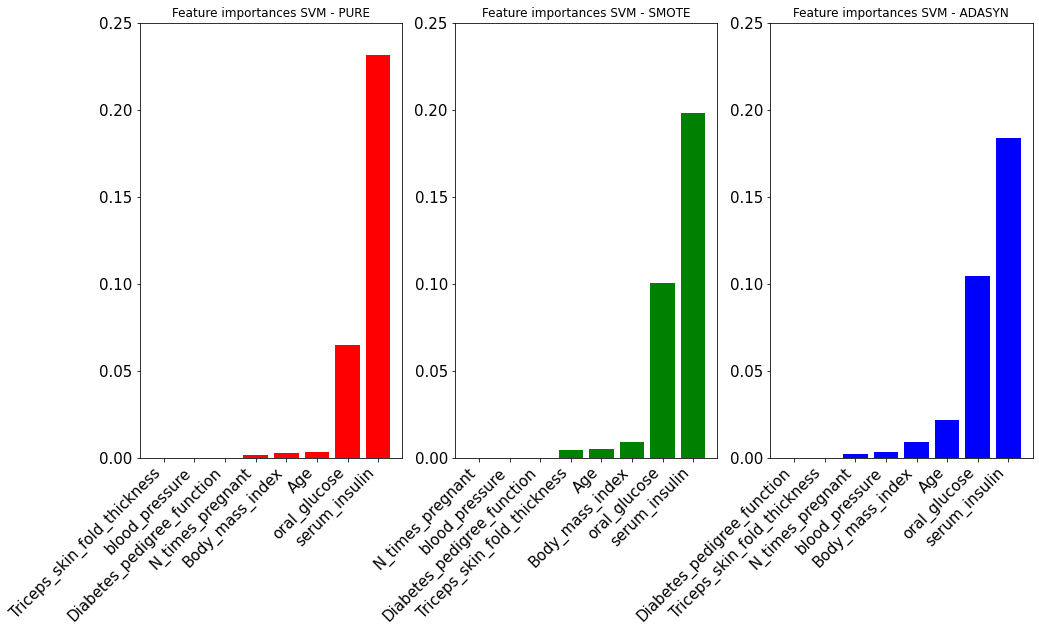

In [86]:
from sklearn.inspection import permutation_importance

fig, axes = plt.subplots(1, 3, figsize=(16, 8))

feature_names = X.columns
features = np.array(feature_names)

axes[0].set_title("Feature importances SVM - PURE")    
perm_importance = permutation_importance(best_model, X, y)
sorted_idx = perm_importance.importances_mean.argsort()
axes[0].bar(features[sorted_idx], perm_importance.importances_mean[sorted_idx], color="r", align="center")
axes[0].set_xticks(range(8), features[sorted_idx], rotation=45, ha='right')
axes[0].set_ylim([0, 0.25])

axes[1].set_title("Feature importances SVM - SMOTE")    
perm_importance = permutation_importance(best_model_smote, X, y)
sorted_idx = perm_importance.importances_mean.argsort()
axes[1].bar(features[sorted_idx], perm_importance.importances_mean[sorted_idx], color="g", align="center")
axes[1].set_xticks(range(8), features[sorted_idx], rotation=45, ha='right')
axes[1].set_ylim([0,0.25])

axes[2].set_title("Feature importances SVM - ADASYN")    
perm_importance = permutation_importance(best_model_adasyn, X, y)
sorted_idx = perm_importance.importances_mean.argsort()
axes[2].bar(features[sorted_idx], perm_importance.importances_mean[sorted_idx], color="b", align="center")
axes[2].set_xticks(range(8), features[sorted_idx], rotation=45, ha='right')
axes[2].set_ylim([0, 0.25])

In [41]:
start_time = time.time()
# DT pure 
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []
performance=0

for i in range(100):
    #학습 데이터 세트, 트레인 데이터 세트 분리
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

    # 로지스틱 회귀로 학습,예측 및 평가 수행. 
    dt_clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=15, min_samples_split=3) #객체 생성
    dt_clf.fit(X_train , y_train) #학습
    pred = dt_clf.predict(X_test) #예측
    # roc_auc_score 수정에 따른 추가
    pred_proba = dt_clf.predict_proba(X_test)[:, 1] #예측 확률 array

    temp = get_clf_eval(y_test , pred, pred_proba)
    
    accuracy_list.append(temp[0])
    precision_list.append(temp[1])
    recall_list.append(temp[2])
    f1_list.append(temp[3])
    auc_list.append(temp[4])
    
    if performance < temp[0] *temp[3]:
        best_model = dt_clf    
    
print('Pure')
print('평균 정확도: {0:.4f}, 평균 정밀도: {1:.4f}, 평균 재현율: {2:.4f}, 평균 F1: {3:.4f}, 평균 AUC:{4:.4f}'
          .format(np.mean(accuracy_list), np.mean(precision_list), np.mean(recall_list), np.mean(f1_list), np.mean(auc_list)))


# DT SMOTE   
accuracy_list_smote = []
precision_list_smote  = []
recall_list_smote  = []
f1_list_smote  = []
auc_list_smote  = []
performance=0

for i in range(100):
    #학습 데이터 세트, 트레인 데이터 세트 분리
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y)
    sm = SMOTE(random_state=0)
    X_resampled2, y_resampled2 = sm.fit_resample(X_train,y_train)

    # 로지스틱 회귀로 학습,예측 및 평가 수행. 
    dt_clf2 = DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, min_samples_split=2)   #객체 생성
    dt_clf2.fit(X_resampled2 , y_resampled2) #학습
    pred2 = dt_clf2.predict(X_test) #예측
    # roc_auc_score 수정에 따른 추가
    pred_proba2 = dt_clf2.predict_proba(X_test)[:, 1] #예측 확률 array
    
    temp2= get_clf_eval(y_test , pred2, pred_proba2)
    
    accuracy_list_smote.append(temp2[0])
    precision_list_smote.append(temp2[1])
    recall_list_smote.append(temp2[2])
    f1_list_smote.append(temp2[3])
    auc_list_smote.append(temp2[4])
    
    if performance < temp2[0] *temp2[3]:
        best_model_smote = dt_clf2      
    
print('SMOTE')
print('평균 정확도: {0:.4f}, 평균 정밀도: {1:.4f}, 평균 재현율: {2:.4f}, 평균 F1: {3:.4f}, 평균 AUC:{4:.4f}'
          .format(np.mean(accuracy_list_smote ), np.mean(precision_list_smote ), np.mean(recall_list_smote ), np.mean(f1_list_smote ), np.mean(auc_list_smote )))

# DT ADASYN
accuracy_list_adasyn = []
precision_list_adasyn = []
recall_list_adasyn  = []
f1_list_adasyn  = []
auc_list_adasyn  = []
performance = 0

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)
    adasyn = ADASYN(random_state=0)
    X_resampled3, y_resampled3 = adasyn.fit_resample(X_train,y_train)

    # 로지스틱 회귀로 학습,예측 및 평가 수행. 
    dt_clf3 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=15, min_samples_split=3)#객체 생성
    dt_clf3.fit(X_resampled3 , y_resampled3) #학습
    pred3 = dt_clf3.predict(X_test) #예측
    # roc_auc_score 수정에 따른 추가
    pred_proba3 = dt_clf3.predict_proba(X_test)[:, 1] #예측 확률 array

    temp3 = get_clf_eval(y_test , pred3, pred_proba3)
    
    accuracy_list_adasyn.append(temp3[0])
    precision_list_adasyn.append(temp3[1])
    recall_list_adasyn.append(temp3[2])
    f1_list_adasyn.append(temp3[3])
    auc_list_adasyn.append(temp3[4])
    
    if performance < temp3[0] *temp3[3]:
        best_model_adasyn = dt_clf3     
    
print('ADASYN')   
print('평균 정확도: {0:.4f}, 평균 정밀도: {1:.4f}, 평균 재현율: {2:.4f}, 평균 F1: {3:.4f}, 평균 AUC:{4:.4f}'
          .format(np.mean(accuracy_list_adasyn ), np.mean(precision_list_adasyn ), np.mean(recall_list_adasyn ), np.mean(f1_list_adasyn ), np.mean(auc_list_adasyn)))

df_dt = pd.DataFrame({'Decision_Tree_accuracy_pure' : accuracy_list,
                     'Decision_Tree_precision_pure' : precision_list,
                     'Decision_Tree_recall_pure' : recall_list,
                     'Decision_Tree_f1_pure' : f1_list,
                     'Decision_Tree_auc_pure' : auc_list,
                     
                     'Decision_Tree_accuracy_smote' : accuracy_list_smote,
                     'Decision_Tree_precision_smote' : precision_list_smote,
                     'Decision_Tree_recall_smote' : recall_list_smote,
                     'Decision_Tree_f1_smote' : f1_list_smote,
                     'Decision_Tree_auc_smote' : auc_list_smote,
                     
                     'Decision_Tree_accuracy_adasyn' : accuracy_list_adasyn,
                     'Decision_Tree_precision_adasyn' : precision_list_adasyn,
                     'Decision_Tree_recall_adasyn' : recall_list_adasyn,
                     'Decision_Tree_f1_adasyn' : f1_list_adasyn,
                     'Decision_Tree_auc_adasyn' : auc_list_adasyn}
                     )

end_time = time.time()
print("Time: {:.4f}sec".format((end_time - start_time)))

Pure
평균 정확도: 0.8794, 평균 정밀도: 0.9184, 평균 재현율: 0.7013, 평균 F1: 0.7912, 평균 AUC:0.8339
SMOTE
평균 정확도: 0.8429, 평균 정밀도: 0.7530, 평균 재현율: 0.7870, 평균 F1: 0.7670, 평균 AUC:0.8286
ADASYN
평균 정확도: 0.7877, 평균 정밀도: 0.6554, 평균 재현율: 0.8228, 평균 F1: 0.7222, 평균 AUC:0.7967
Time: 2.5983sec


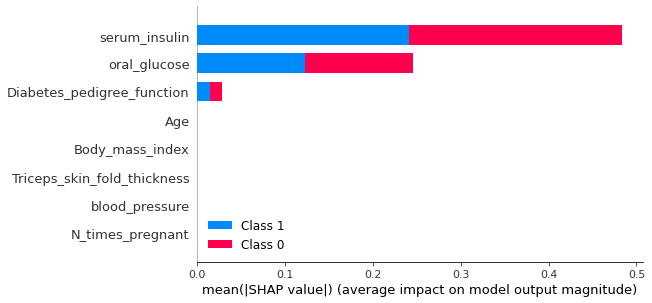

In [107]:
import shap

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)

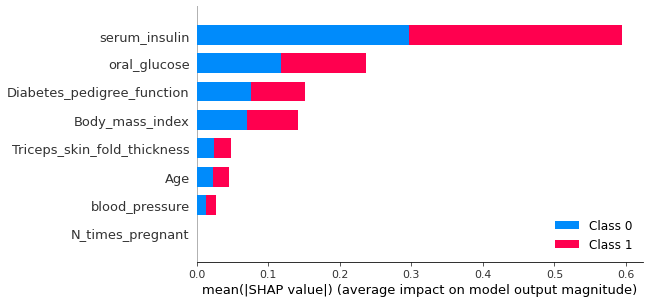

In [114]:
explainer = shap.TreeExplainer(best_model_smote)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)

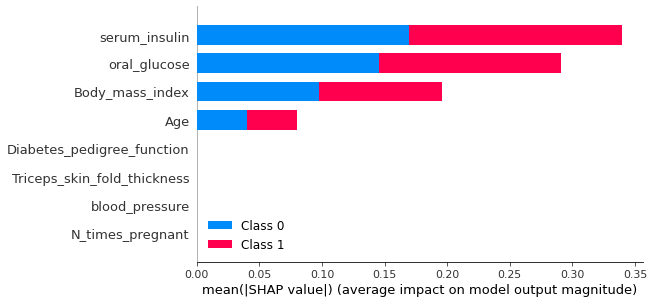

In [115]:
explainer = shap.TreeExplainer(best_model_adasyn)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)

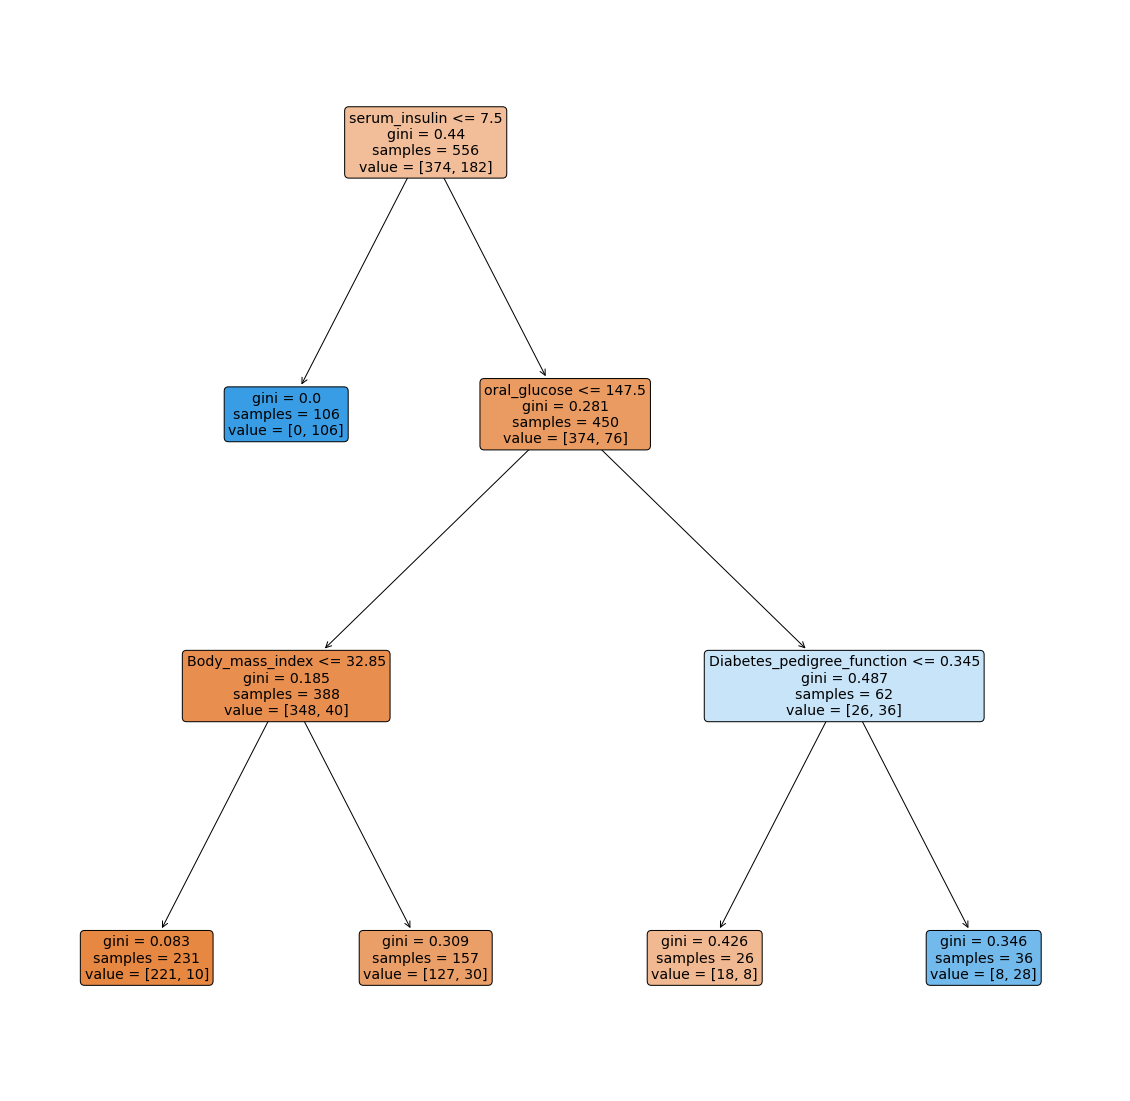

In [89]:
from sklearn.tree import plot_tree, export_text

plt.rcParams["figure.figsize"] = (20, 20)
plt.rcParams["font.size"] = 40
plt.rcParams['axes.unicode_minus'] = False
plt.figure()
plot_tree(best_model, feature_names=X.columns, impurity=True, filled=True, rounded=True, max_depth=3)
plt.show()

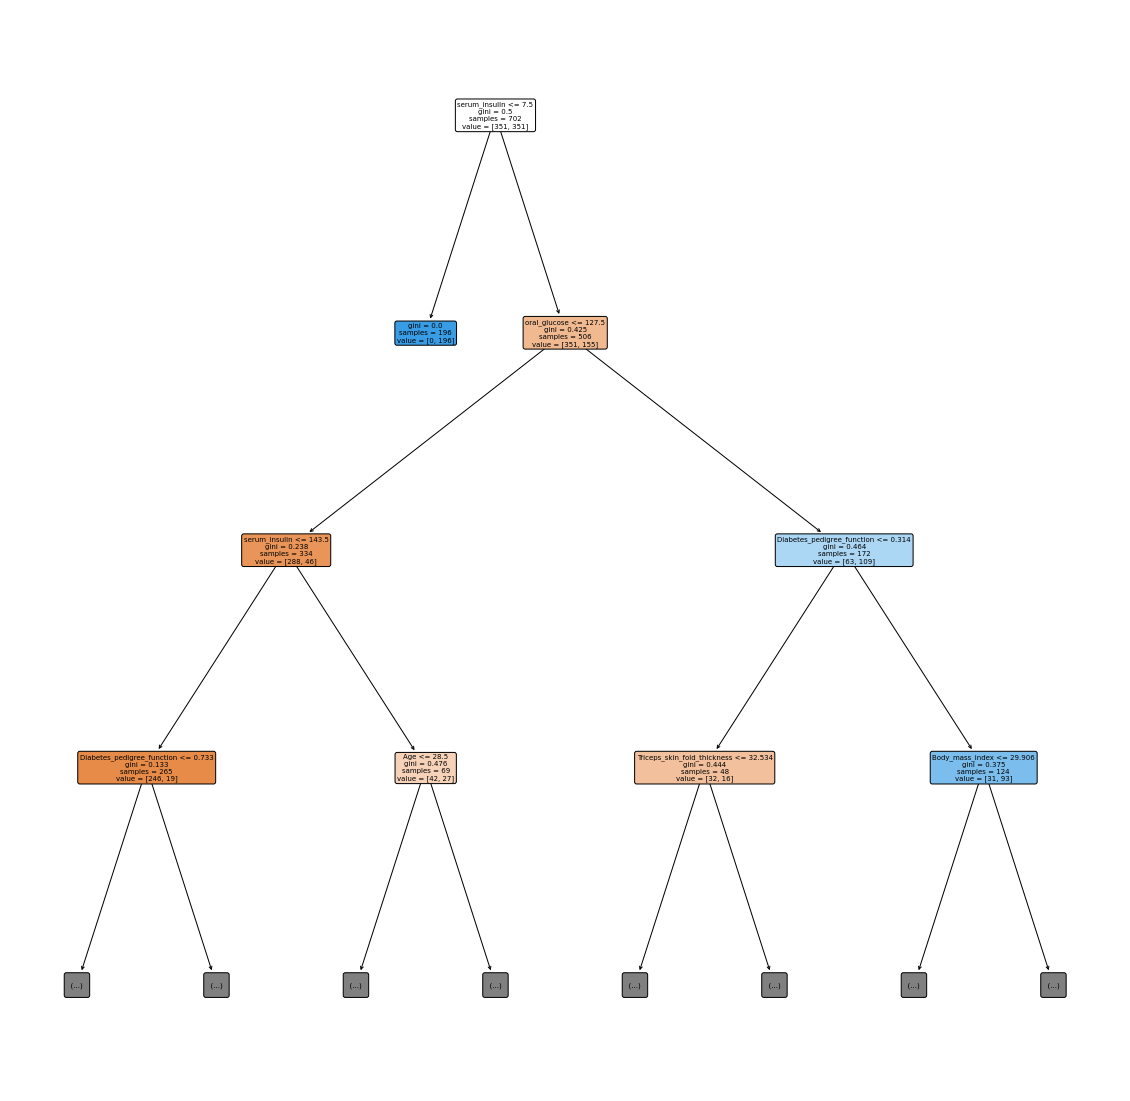

In [90]:
from sklearn.tree import plot_tree, export_text

plt.rcParams["figure.figsize"] = (20, 20)
plt.rcParams["font.size"] = 40
plt.rcParams['axes.unicode_minus'] = False
plt.figure()
plot_tree(best_model_smote, feature_names=X.columns, impurity=True, filled=True, rounded=True, max_depth=3)
plt.show()

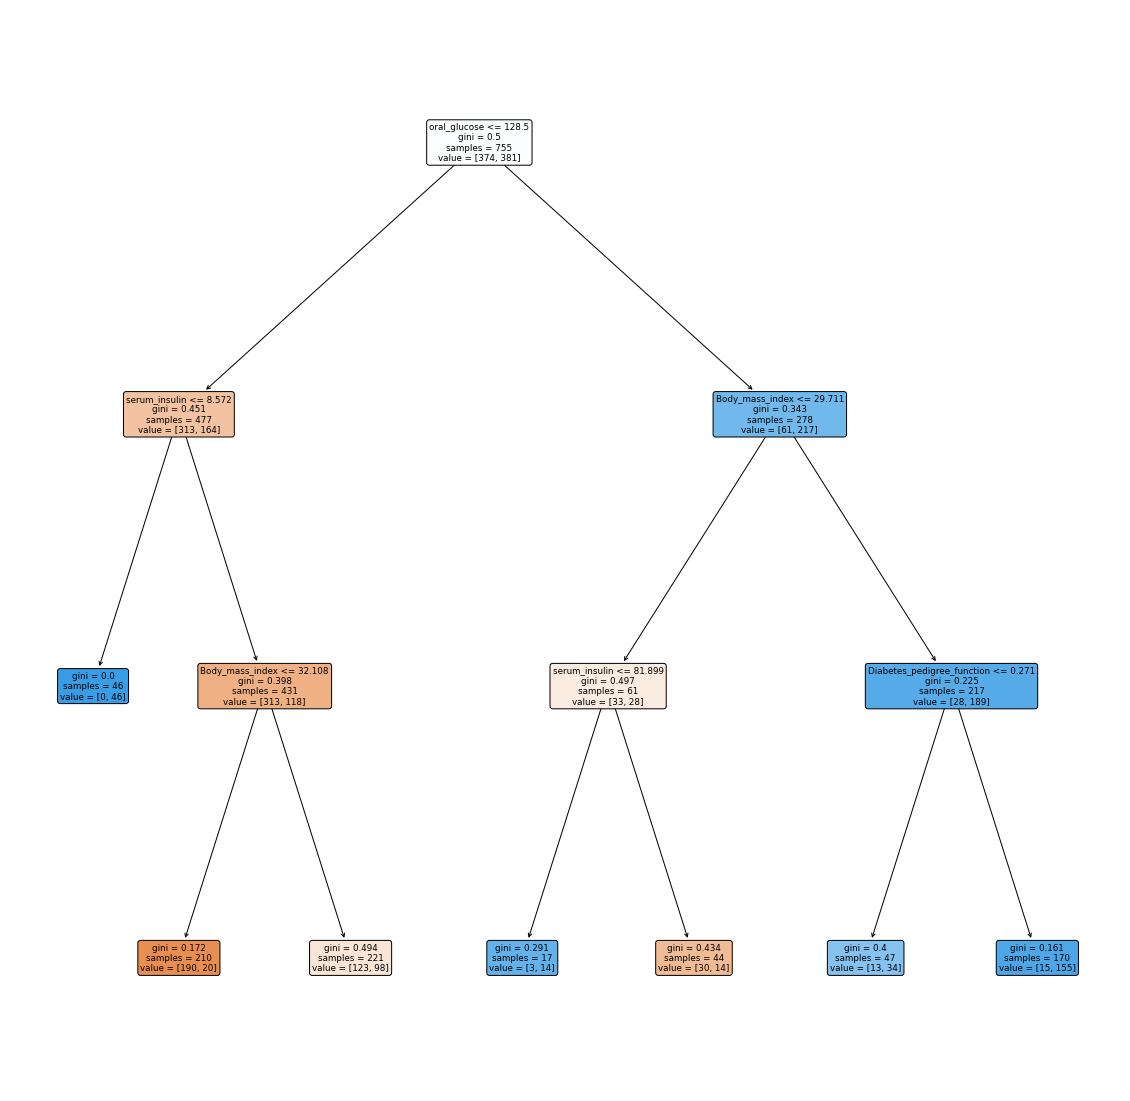

In [91]:
from sklearn.tree import plot_tree, export_text

plt.rcParams["figure.figsize"] = (20, 20)
plt.rcParams["font.size"] = 40
plt.rcParams['axes.unicode_minus'] = False
plt.figure()
plot_tree(best_model_adasyn, feature_names=X.columns, impurity=True, filled=True, rounded=True, max_depth=3)
plt.show()

In [42]:
start_time = time.time()
# RF pure 
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []


for i in range(100):
    #학습 데이터 세트, 트레인 데이터 세트 분리
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

    # 로지스틱 회귀로 학습,예측 및 평가 수행. 
    rf_clf = RandomForestClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=4) #객체 생성
    rf_clf.fit(X_train , y_train) #학습
    pred = rf_clf.predict(X_test) #예측
    # roc_auc_score 수정에 따른 추가
    pred_proba = rf_clf.predict_proba(X_test)[:, 1] #예측 확률 array

    temp = get_clf_eval(y_test , pred, pred_proba)
    
    accuracy_list.append(temp[0])
    precision_list.append(temp[1])
    recall_list.append(temp[2])
    f1_list.append(temp[3])
    auc_list.append(temp[4])
print('Pure')
print('평균 정확도: {0:.4f}, 평균 정밀도: {1:.4f}, 평균 재현율: {2:.4f}, 평균 F1: {3:.4f}, 평균 AUC:{4:.4f}'
          .format(np.mean(accuracy_list), np.mean(precision_list), np.mean(recall_list), np.mean(f1_list), np.mean(auc_list)))


# RF SMOTE   
accuracy_list_smote = []
precision_list_smote  = []
recall_list_smote  = []
f1_list_smote  = []
auc_list_smote  = []


for i in range(100):
    #학습 데이터 세트, 트레인 데이터 세트 분리
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y)
    sm = SMOTE(random_state=0)
    X_resampled2, y_resampled2 = sm.fit_resample(X_train,y_train)

    # 로지스틱 회귀로 학습,예측 및 평가 수행. 
    rf_clf2 = DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=4)   #객체 생성
    rf_clf2.fit(X_resampled2 , y_resampled2) #학습
    pred2 = rf_clf2.predict(X_test) #예측
    # roc_auc_score 수정에 따른 추가
    pred_proba2 = rf_clf2.predict_proba(X_test)[:, 1] #예측 확률 array

    temp2 = get_clf_eval(y_test , pred2, pred_proba2)
    
    accuracy_list_smote.append(temp[0])
    precision_list_smote.append(temp[1])
    recall_list_smote.append(temp[2])
    f1_list_smote.append(temp[3])
    auc_list_smote.append(temp[4])
print('SMOTE')
print('평균 정확도: {0:.4f}, 평균 정밀도: {1:.4f}, 평균 재현율: {2:.4f}, 평균 F1: {3:.4f}, 평균 AUC:{4:.4f}'
          .format(np.mean(accuracy_list_smote ), np.mean(precision_list_smote ), np.mean(recall_list_smote ), np.mean(f1_list_smote ), np.mean(auc_list_smote )))

# RF ADASYN
accuracy_list_adasyn = []
precision_list_adasyn = []
recall_list_adasyn  = []
f1_list_adasyn  = []
auc_list_adasyn  = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)
    adasyn = ADASYN(random_state=0)
    X_resampled3, y_resampled3 = adasyn.fit_resample(X_train,y_train)

    # 로지스틱 회귀로 학습,예측 및 평가 수행. 
    rf_clf3 = DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=4)#객체 생성
    rf_clf3.fit(X_resampled3 , y_resampled3) #학습
    pred3 = rf_clf3.predict(X_test) #예측
    # roc_auc_score 수정에 따른 추가
    pred_proba3 = rf_clf3.predict_proba(X_test)[:, 1] #예측 확률 array

    temp3 = get_clf_eval(y_test , pred3, pred_proba3)
    
    accuracy_list_adasyn.append(temp3[0])
    precision_list_adasyn.append(temp3[1])
    recall_list_adasyn.append(temp3[2])
    f1_list_adasyn.append(temp3[3])
    auc_list_adasyn.append(temp3[4])
print('ADASYN')   
print('평균 정확도: {0:.4f}, 평균 정밀도: {1:.4f}, 평균 재현율: {2:.4f}, 평균 F1: {3:.4f}, 평균 AUC:{4:.4f}'
          .format(np.mean(accuracy_list_adasyn ), np.mean(precision_list_adasyn ), np.mean(recall_list_adasyn ), np.mean(f1_list_adasyn ), np.mean(auc_list_adasyn)))

df_rf = pd.DataFrame({'Random_Forest_accuracy_pure' : accuracy_list,
                     'Random_Forest_precision_pure' : precision_list,
                     'Random_Forest_recall_pure' : recall_list,
                     'Random_Forest_f1_pure' : f1_list,
                     'Random_Forest_auc_pure' : auc_list,
                     
                     'Random_Forest_accuracy_smote' : accuracy_list_smote,
                     'Random_Forest_precision_smote' : precision_list_smote,
                     'Random_Forest_recall_smote' : recall_list_smote,
                     'Random_Forest_f1_smote' : f1_list_smote,
                     'Random_Forest_auc_smote' : auc_list_smote,
                     
                     'Random_Forest_accuracy_adasyn' : accuracy_list_adasyn,
                     'Random_Forest_precision_adasyn' : precision_list_adasyn,
                     'Random_Forest_recall_adasyn' : recall_list_adasyn,
                     'Random_Forest_f1_adasyn' : f1_list_adasyn,
                     'Random_Forest_auc_adasyn' : auc_list_adasyn}
                     )

end_time = time.time()
print("Time: {:.4f}sec".format((end_time - start_time)))

Pure
평균 정확도: 0.8833, 평균 정밀도: 0.9085, 평균 재현율: 0.7189, 평균 F1: 0.8009, 평균 AUC:0.8413
SMOTE
평균 정확도: 0.9143, 평균 정밀도: 0.9474, 평균 재현율: 0.7826, 평균 F1: 0.8571, 평균 AUC:0.8807
ADASYN
평균 정확도: 0.8108, 평균 정밀도: 0.6777, 평균 재현율: 0.8239, 평균 F1: 0.7415, 평균 AUC:0.8141
Time: 13.4173sec


In [43]:
start_time = time.time()

# XGB pure 
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []
performance = 0

for i in range(100):
    #학습 데이터 세트, 트레인 데이터 세트 분리
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

    # 로지스틱 회귀로 학습,예측 및 평가 수행. 
    xgb_clf = XGBClassifier(learning_rate = 0.0001, max_depth=4, n_estimators = 25, subsample = '0.9') #객체 생성
    xgb_clf.fit(X_train , y_train) #학습
    pred = xgb_clf.predict(X_test) #예측
    # roc_auc_score 수정에 따른 추가
    pred_proba = xgb_clf.predict_proba(X_test)[:, 1] #예측 확률 array

    temp = get_clf_eval(y_test , pred, pred_proba)
    
    accuracy_list.append(temp[0])
    precision_list.append(temp[1])
    recall_list.append(temp[2])
    f1_list.append(temp[3])
    auc_list.append(temp[4])

    if performance < temp[0] *temp[3]:
        best_model = xgb_clf      
    
print('Pure')
print('평균 정확도: {0:.4f}, 평균 정밀도: {1:.4f}, 평균 재현율: {2:.4f}, 평균 F1: {3:.4f}, 평균 AUC:{4:.4f}'
          .format(np.mean(accuracy_list), np.mean(precision_list), np.mean(recall_list), np.mean(f1_list), np.mean(auc_list)))


# RF SMOTE   
accuracy_list_smote = []
precision_list_smote  = []
recall_list_smote  = []
f1_list_smote  = []
auc_list_smote  = []
performance=0

for i in range(100):
    #학습 데이터 세트, 트레인 데이터 세트 분리
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y)
    sm = SMOTE(random_state=0)
    X_resampled2, y_resampled2 = sm.fit_resample(X_train,y_train)

    # 로지스틱 회귀로 학습,예측 및 평가 수행. 
    xgb_clf2 = XGBClassifier(learning_rate = 0.1, max_depth=7, n_estimators = 75, subsample = '0.7')   #객체 생성
    xgb_clf2.fit(X_resampled2 , y_resampled2) #학습
    pred2 = xgb_clf2.predict(X_test) #예측
    # roc_auc_score 수정에 따른 추가
    pred_proba2 = xgb_clf2.predict_proba(X_test)[:, 1] #예측 확률 array

    temp2 = get_clf_eval(y_test , pred2, pred_proba2)
    
    accuracy_list_smote.append(temp2[0])
    precision_list_smote.append(temp2[1])
    recall_list_smote.append(temp2[2])
    f1_list_smote.append(temp2[3])
    auc_list_smote.append(temp2[4])
    
    if performance < temp2[0] *temp2[3]:
        best_model_smote = xgb_clf2   
            
print('SMOTE')
print('평균 정확도: {0:.4f}, 평균 정밀도: {1:.4f}, 평균 재현율: {2:.4f}, 평균 F1: {3:.4f}, 평균 AUC:{4:.4f}'
          .format(np.mean(accuracy_list_smote ), np.mean(precision_list_smote ), np.mean(recall_list_smote ), np.mean(f1_list_smote ), np.mean(auc_list_smote )))

# RF ADASYN
accuracy_list_adasyn = []
precision_list_adasyn = []
recall_list_adasyn  = []
f1_list_adasyn  = []
auc_list_adasyn  = []
performance=0

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)
    adasyn = ADASYN(random_state=0)
    X_resampled3, y_resampled3 = adasyn.fit_resample(X_train,y_train)

    # 로지스틱 회귀로 학습,예측 및 평가 수행. 
    xgb_clf3 = XGBClassifier(learning_rate = 0.1, max_depth=7, n_estimators = 75, subsample = '0.7') 
    xgb_clf3.fit(X_resampled3 , y_resampled3) #학습
    pred3 = xgb_clf3.predict(X_test) #예측
    # roc_auc_score 수정에 따른 추가
    pred_proba3 = xgb_clf3.predict_proba(X_test)[:, 1] #예측 확률 array

    temp3 = get_clf_eval(y_test , pred3, pred_proba3)
    
    accuracy_list_adasyn.append(temp3[0])
    precision_list_adasyn.append(temp3[1])
    recall_list_adasyn.append(temp3[2])
    f1_list_adasyn.append(temp3[3])
    auc_list_adasyn.append(temp3[4])
    
    if performance < temp3[0] *temp3[3]:
        best_model_adasyn = xgb_clf3       
    
print('ADASYN')   
print('평균 정확도: {0:.4f}, 평균 정밀도: {1:.4f}, 평균 재현율: {2:.4f}, 평균 F1: {3:.4f}, 평균 AUC:{4:.4f}'
          .format(np.mean(accuracy_list_adasyn ), np.mean(precision_list_adasyn ), np.mean(recall_list_adasyn ), np.mean(f1_list_adasyn ), np.mean(auc_list_adasyn)))

df_xgb = pd.DataFrame({'XGboost_accuracy_pure' : accuracy_list,
                     'XGboost_precision_pure' : precision_list,
                     'XGboost_recall_pure' : recall_list,
                     'XGboost_f1_pure' : f1_list,
                     'XGboost_auc_pure' : auc_list,
                     
                     'XGboost_accuracy_smote' : accuracy_list_smote,
                     'XGboost_precision_smote' : precision_list_smote,
                     'XGboost_recall_smote' : recall_list_smote,
                     'XGboost_f1_smote' : f1_list_smote,
                     'XGboost_auc_smote' : auc_list_smote,
                     
                     'XGboost_accuracy_adasyn' : accuracy_list_adasyn,
                     'XGboost_precision_adasyn' : precision_list_adasyn,
                     'XGboost_recall_adasyn' : recall_list_adasyn,
                     'XGboost_f1_adasyn' : f1_list_adasyn,
                     'XGboost_auc_adasyn' : auc_list_adasyn}
                     )

end_time = time.time()
print("Time: {:.4f}sec".format((end_time - start_time)))

Pure
평균 정확도: 0.8794, 평균 정밀도: 0.9017, 평균 재현율: 0.7141, 평균 F1: 0.7940, 평균 AUC:0.8372
SMOTE
평균 정확도: 0.8819, 평균 정밀도: 0.8414, 평균 재현율: 0.7916, 평균 F1: 0.8141, 평균 AUC:0.8587
ADASYN
평균 정확도: 0.8749, 평균 정밀도: 0.8017, 평균 재현율: 0.8276, 평균 F1: 0.8128, 평균 AUC:0.8628
Time: 14.4836sec


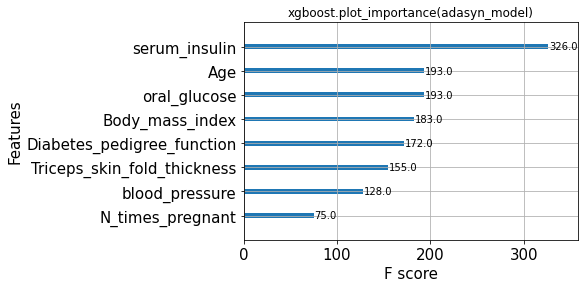

In [68]:
import xgboost
xgboost.plot_importance(best_model_adasyn)
plt.title("xgboost.plot_importance(adasyn_model)")
plt.show()

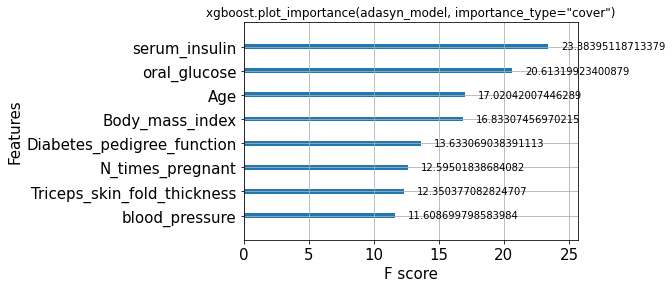

In [69]:
#https://towardsdatascience.com/interpretable-machine-learning-with-xgboost-9ec80d148d27

xgboost.plot_importance(best_model_adasyn, importance_type="cover")
plt.title('xgboost.plot_importance(adasyn_model, importance_type="cover")')
plt.show()

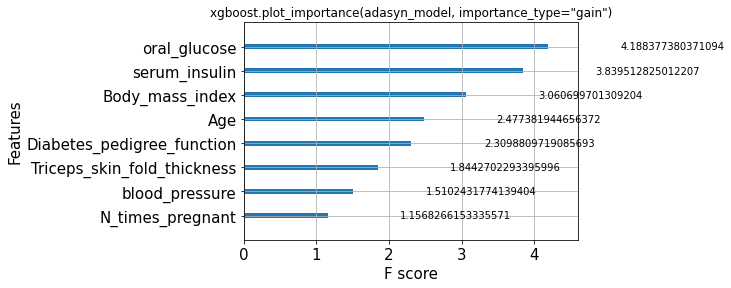

In [70]:
xgboost.plot_importance(best_model_adasyn, importance_type="gain")
plt.title('xgboost.plot_importance(adasyn_model, importance_type="gain")')
plt.show()

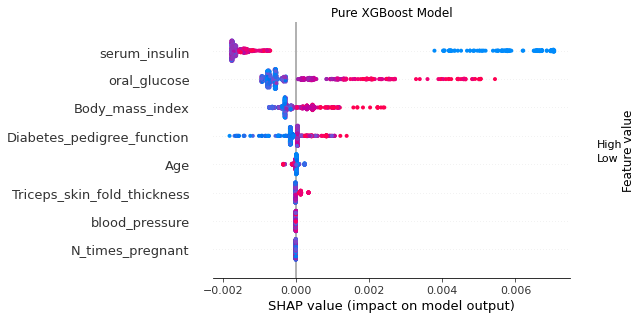

In [83]:
import shap

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X)
plt.title("Pure XGBoost Model")
shap.summary_plot(shap_values, X)

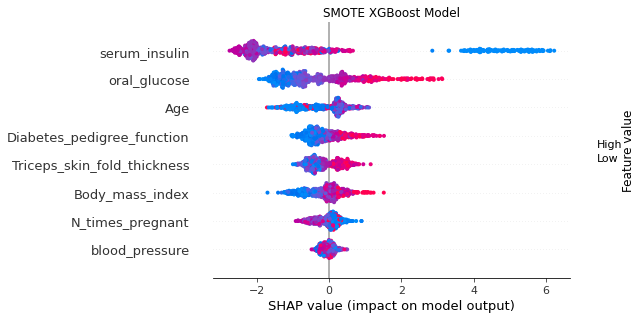

In [84]:
explainer = shap.TreeExplainer(best_model_smote)
shap_values = explainer.shap_values(X)
plt.title("SMOTE XGBoost Model")
shap.summary_plot(shap_values, X)

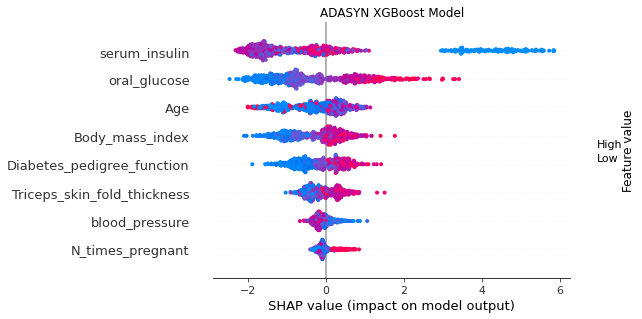

In [85]:
explainer = shap.TreeExplainer(best_model_adasyn)
shap_values = explainer.shap_values(X)
plt.title("ADASYN XGBoost Model")
shap.summary_plot(shap_values, X)

In [86]:
df.columns

Index(['N_times_pregnant', 'oral_glucose', 'blood_pressure',
       'Triceps_skin_fold_thickness', 'serum_insulin', 'Body_mass_index',
       'Diabetes_pedigree_function', 'Age', 'target', 'Age_group',
       'new_glucose', 'new_age', 'new_BMI'],
      dtype='object')

In [87]:
df_final = pd.concat([df_lg,df_svc,df_dt,df_rf,df_xgb],axis=1, join='inner')
df_final = df_final.round(4)
result=np.array(df_final.mean().values)
result = result.reshape(-1,5)

df_result = pd.DataFrame(result, columns=['평균 정확도', '평균 정밀도', '평균 재현율', '평균 F1', '평균 AUC'])
df_result.index = ['logistic Pure','logistic SMOTE','logistic ADASYN',
                   'SVM Pure','SVM SMOTE','SVM ADASYN',
                   'Decision Tree Pure','Decision Tree SMOTE','Decision Tree ADASYN',
                   'Random Forest Pure','Random Forest SMOTE','Random Forest ADASYN',
                   'XGBoost Pure','XGBoost SMOTE','XGBoost ADASYN']

In [88]:
df_result

,평균 정확도,평균 정밀도,평균 재현율,평균 F1,평균 AUC
logistic Pure,0.848711,0.804082,0.717825,0.756303,0.815299
logistic SMOTE,0.825503,0.704445,0.816083,0.754728,0.823095
logistic ADASYN,0.786144,0.633342,0.843252,0.721808,0.800725
SVM Pure,0.879791,0.939810,0.679135,0.785956,0.828553
SVM SMOTE,0.873073,0.821925,0.789777,0.803422,0.851807
SVM ADASYN,0.832427,0.692903,0.890426,0.778016,0.847240
Decision Tree Pure,0.879358,0.918400,0.701308,0.791177,0.833895
Decision Tree SMOTE,0.842933,0.753039,0.787018,0.766962,0.828595
Decision Tree ADASYN,0.787715,0.655426,0.822826,0.722211,0.796678
Random Forest Pure,0.883286,0.908538,0.718914,0.800879,0.841318
